# **Business Understanding:**
A Consumer Finance Company which specializes in lending various types of loans to various customers has to make a decision whenever it receives a loan request

When a person applies for a loan, there are two types of decisions that could be taken by the company:
Loan accepted
Loan denied

There are 3 possible scenarios when a loan gets approved:
**Fully Paid**
**Charged Off**
**Current**

Fully Paid: When the applicant fully pays the loan amount along with the interests

Charged Off: When the applicant has not paid the installments for a longer period

Current: When the applicant is still in the process of paying the installments


# **Problem Statement:**

Two types of risks are associated with the bank’s decision:

If the applicant is **likely to repay the loan**, then not approving the loan results is a loss of business to the company
If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The Consumer Finance Company has provided applicant’s dataset from 2007 to 2011 for loans that were approved with details like whether the loan was charged off or fully paid.

The aim is to analysis all the variables in the given dataset and identify right patterns which indicate if a person is likely to fully pay the loan amount or will become a defaulter.

This in turn will help in taking the right actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


# **Case Study Objective:**

**Identification of risky loan applicants using EDA is the aim of this case study**


# **IMPORTANT NOTE**

We are using **matplotlib.__version__ == '3.4.0'**

we are using the below command in the import libaries cell:
**if(matplotlib.__version__ != '3.4.0'):
    !pip install matplotlib==3.4.0
    exit()**

In [1]:
import matplotlib
print(matplotlib.__version__)
if(matplotlib.__version__ != '3.4.0'):
  !pip install matplotlib==3.4.0 --user
  exit()
print(matplotlib.__version__)

3.4.0
3.4.0


# **Import the required libraries:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import math

# **Import the file loan.csv into a Pandas Dataframe:**

In [3]:
loan = pd.read_csv('loan.csv')

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# **Helper Functions Def:**

## The below user defined functions are used to reduce the effort for:


1.   add_labels_to_barplot_single() - to create barplots using mean
2.   add_labels_to_barplot_multi() - to create barplots using mean
3.   funcRangeCat() - to create buckets or bins
4.   add_labels_to_barplot_multi_median() - to create barplots using median



In [5]:
def add_labels_to_barplot_single(x_axis, y_axis):
  ax = sns.barplot(x=x_axis, y=y_axis, data=loan, palette='Set2', ci=None)
  return (ax.bar_label(ax.containers[0], fmt='%.1f'))

def add_labels_to_barplot_multi(x_axis, y_axis):
  ax = sns.barplot(x_axis, y_axis, hue='loan_status', data=loan[loan.loan_status!='Current'].sort_values(x_axis), palette='Set2', ci=None)
  for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')

def funcRangeCat(initialValue,value,increment,Prefix):
  arr = np.arange(initialValue,value + increment + 1,increment)
  cat = str(arr[-2]) + '-' + str(arr[-1])
  #return cat
  return Prefix + str(len(arr)) + '[' + cat + ']'

def add_labels_to_barplot_multi_median(x_axis, y_axis):
  ax = sns.barplot(x_axis, y_axis, hue='loan_status', data=loan[loan.loan_status!='Current'].sort_values(x_axis), palette='Set2', ci=None,estimator=np.median)
  for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')

# **Data Preparation:**



1.   Drop Columns
2.   Handle Missing Values
3.   Outlier Detection
4.   Clean the data, remove special charcters, etc
5.   Create Derived Variables
6.   Drop rows if required



# **Drop the columns which are not required in our analysis:**

*The columns with just one unique value won't help in any analysis*

1.  Figure out the list of columns with just zero unique value
2.  Figure out the list of columns with just one unique value
3.  Drop those columns

In [6]:
#Figure out the list of columns with just zero unique value
loan_columns_with_zero_distinct_val = pd.DataFrame(loan.nunique(axis=0)[loan.nunique(axis=0) == 0]).reset_index()
print(loan_columns_with_zero_distinct_val)
#Figure out the list of columns with just one unique value
loan_columns_with_one_distinct_val = pd.DataFrame(loan.nunique(axis=0)[loan.nunique(axis=0) == 1]).reset_index()
print(loan_columns_with_one_distinct_val)

                             index  0
0      mths_since_last_major_derog  0
1                 annual_inc_joint  0
2                        dti_joint  0
3        verification_status_joint  0
4                     tot_coll_amt  0
5                      tot_cur_bal  0
6                      open_acc_6m  0
7                       open_il_6m  0
8                      open_il_12m  0
9                      open_il_24m  0
10              mths_since_rcnt_il  0
11                    total_bal_il  0
12                         il_util  0
13                     open_rv_12m  0
14                     open_rv_24m  0
15                      max_bal_bc  0
16                        all_util  0
17                total_rev_hi_lim  0
18                          inq_fi  0
19                     total_cu_tl  0
20                    inq_last_12m  0
21            acc_open_past_24mths  0
22                     avg_cur_bal  0
23                  bc_open_to_buy  0
24                         bc_util  0
25          

In [7]:
loan = loan.drop(columns=np.array(loan_columns_with_zero_distinct_val.iloc[:,0]))
print("Shape after dropping columns with zero unique value:", loan.shape)
loan = loan.drop(columns=np.array(loan_columns_with_one_distinct_val.iloc[:,0]))
print("Shape after dropping columns with one unique value:", loan.shape)

Shape after dropping columns with zero unique value: (39717, 57)
Shape after dropping columns with one unique value: (39717, 48)


###Drop the below columns which are applicable only after an applicant gets the loan.

Hence, it is of no use for our analysis

'revol_bal','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','inq_last_6mths','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','next_pymnt_d'

In [8]:
loan = loan.drop(columns=['revol_bal','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','inq_last_6mths','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','next_pymnt_d'])
print("Shape after dropping not applicable columns during the loan approval process", loan.shape)

Shape after dropping not applicable columns during the loan approval process (39717, 32)


In [9]:
len(loan.columns)

32

# **Missing Values:**

In [10]:
loan.isna().sum()[loan.isna().sum() > 0].sort_values(ascending = False)

mths_since_last_record    36931
mths_since_last_delinq    25682
desc                      12940
emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
title                        11
dtype: int64

**Drop These columns**:
mths_since_last_record,mths_since_last_delinq,  desc have high numbers of null values.These columns can be dropped           

**Drop these columns**: emp_title and title
emp_title doesnot categorize into any type of profession and has lot of unique values, which won't be of any use to us

title seems to be more redundant when we already have the purpose column

url will be of no use in our analysis

In [11]:
loan = loan.drop(columns= ["mths_since_last_record","mths_since_last_delinq","desc","emp_title","title","url"])
print(loan.shape)

(39717, 26)


In [12]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

# **Outlier Detection**

##Outlier detection for the variable annual income (annual_inc)

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

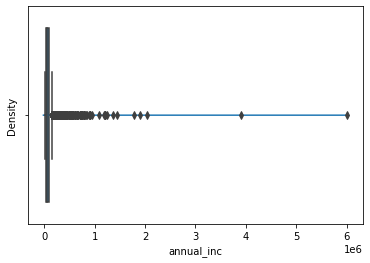

In [13]:
print(loan["annual_inc"].describe())
sns.distplot(loan["annual_inc"])
#plt.show()
sns.boxplot(loan["annual_inc"])
#plt.show()

### Observation:
75% of the member have income less than 82K
Above 100K can be considered outlier

The below plots excluding the outliers looks much better

count    33517.00000
mean     54153.59239
std      20648.49136
min       4000.00000
25%      38400.00000
50%      52000.00000
75%      70000.00000
max      99999.00000
Name: annual_inc, dtype: float64


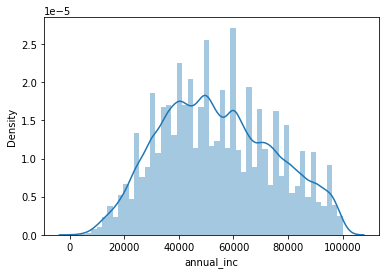

<AxesSubplot:xlabel='annual_inc'>

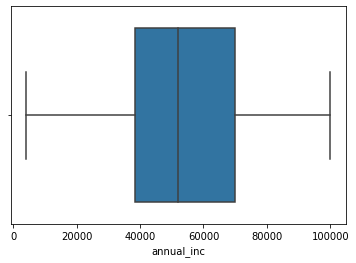

In [14]:
#The same view excluding the outliers:
print(loan[loan["annual_inc"] < 100000]["annual_inc"].describe())
sns.distplot(loan[loan["annual_inc"] < 100000]["annual_inc"])
plt.show()
sns.boxplot(x=loan[loan["annual_inc"] < 100000]["annual_inc"])

##Outlier detection for the variable loan amount (loan_amnt)

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


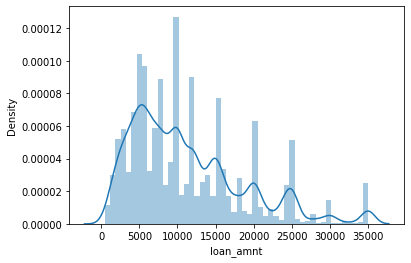

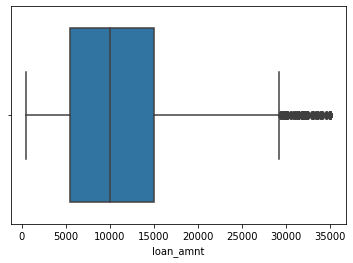

In [15]:
print(loan["loan_amnt"].describe())
sns.distplot(loan["loan_amnt"])
plt.show()
sns.boxplot(x=loan["loan_amnt"])
plt.show()

In [16]:
print(np.percentile(np.array(loan["loan_amnt"]),95))

25000.0


##Outlier detection for the variable funded amount (funded_amnt)

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


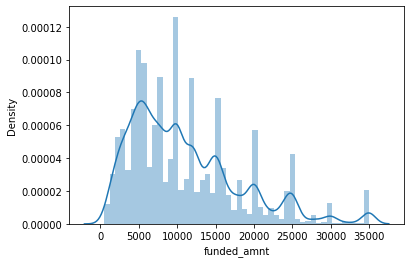

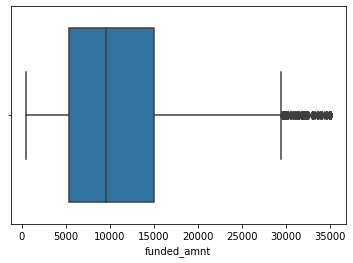

In [17]:
print(loan["funded_amnt"].describe())
sns.distplot(loan["funded_amnt"])
plt.show()
sns.boxplot(x=loan["funded_amnt"])
plt.show()

In [18]:
print(np.percentile(np.array(loan["funded_amnt"]),95))

25000.0


##Outlier detection for the variable funded investor amount (funded_amnt_inv)

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


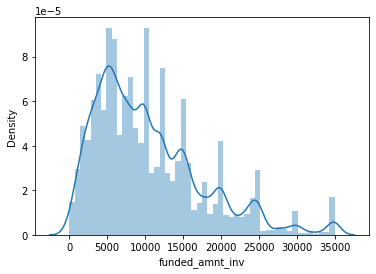

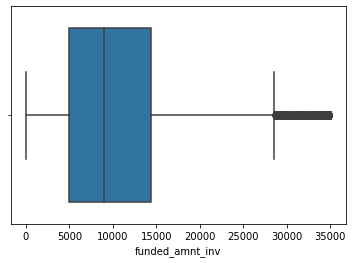

In [19]:
print(loan["funded_amnt_inv"].describe())
sns.distplot(loan["funded_amnt_inv"])
plt.show()
sns.boxplot(x=loan["funded_amnt_inv"])
plt.show()

In [20]:
print(np.percentile(np.array(loan["funded_amnt_inv"]),95))

24736.572264


##Outlier detection for the variable interest rates (int_rate)

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


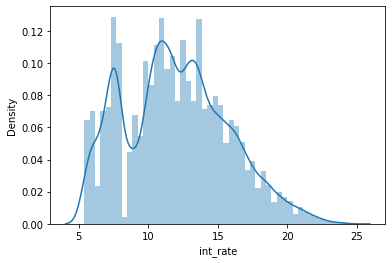

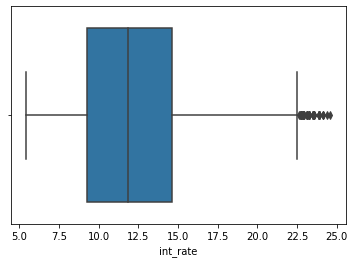

In [21]:
print(loan["int_rate"].apply(lambda x: str(x).replace('%','')).astype('float').describe())
sns.distplot(loan["int_rate"].apply(lambda x: str(x).replace('%','')).astype('float'))
plt.show()
sns.boxplot(x=loan["int_rate"].apply(lambda x: str(x).replace('%','')).astype('float'))
plt.show()


In [22]:
print(np.percentile(np.array(loan["int_rate"].apply(lambda x: str(x).replace('%','')).astype('float')),95))

18.54


##Outlier detection for the variable monthly installments (installment)

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


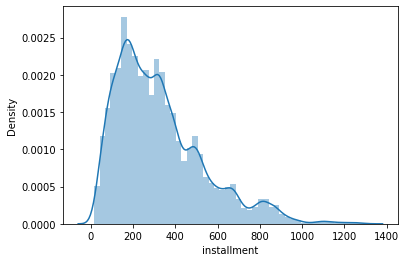

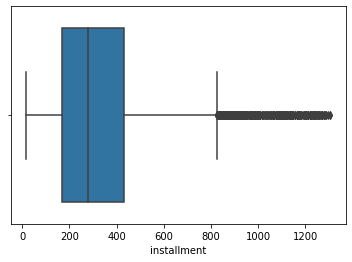

In [23]:
print(loan["installment"].describe())
sns.distplot(loan["installment"])
plt.show()
sns.boxplot(x=loan["installment"])
plt.show()

In [24]:
print(np.percentile(np.array(loan["installment"]),95))

762.9959999999994


# **Analyze the datatypes of the different variables:**


1.   Check if the ints and floats are ints and floats respectively and not objects
2.   Check for int columns with symbols like %, remove them special chars from percentage fields and make it a float
3.   Check for date variables and convert to datetime
4.   Check the variable "term".It has values like 36 months.Need to remove " months from the string"



In [25]:
#Check if the ints and floats are ints and floats respectively and not objects
loan.dtypes
#Ints are ints and floats are float.Only the percentage variables needs to be changed to float after removing the % symbol

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [26]:
#Check for int columns with symbols like %, remove them special chars from percentage fields and make it a float
#Concerned columns is int_rate
loan["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [27]:
#Remove the percentage chanracter and convert variables to float
loan["int_rate"] = loan["int_rate"].apply(lambda x: str(x).replace('%','')).astype('float')

In [28]:
#Check whether the datatypes have changed to float or not
loan["int_rate"].dtypes

dtype('float64')

In [29]:
#Check for date variables and convert to datetime
#The concerned columns are: issue_d,earliest_cr_line
#loan[["issue_d","earliest_cr_line","last_pymnt_d"]]
date_cols = ["issue_d","earliest_cr_line"]
print(date_cols)
for i in date_cols:
  loan[i+'_month'] = loan[i].apply(lambda x: str(x)[0:3])
  loan[i+'_year'] = loan[i].apply(lambda x: str(x)[4:6])

['issue_d', 'earliest_cr_line']


In [30]:
#View the newly added columns
loan[["issue_d","issue_d_month","issue_d_year","earliest_cr_line","earliest_cr_line_month","earliest_cr_line_year"]]

,issue_d,issue_d_month,issue_d_year,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year
0,Dec-11,Dec,11,Jan-85,Jan,85
1,Dec-11,Dec,11,Apr-99,Apr,99
2,Dec-11,Dec,11,Nov-01,Nov,01
3,Dec-11,Dec,11,Feb-96,Feb,96
4,Dec-11,Dec,11,Jan-96,Jan,96
...,...,...,...,...,...,...
39712,Jul-07,Jul,07,Nov-90,Nov,90
39713,Jul-07,Jul,07,Dec-86,Dec,86
39714,Jul-07,Jul,07,Oct-98,Oct,98
39715,Jul-07,Jul,07,Nov-88,Nov,88


In [31]:
#Check the variable "term".It has values like 36 months.Need to remove " months from the string"
#Convert the datatype from Object to int
loan["term"] = loan["term"].apply(lambda x: str(x).replace(' months','')).astype('int')
print(loan["term"].head())
print(loan["term"].dtypes)

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64
int64


In [32]:
#Check the emp_length column, value counts and examine the uniques values
print('before change',loan["emp_length"].value_counts())
#Remove year and years from the values
loan["emp_length"] = loan["emp_length"].apply(lambda x: str(x).replace(' years','').replace(' year',''))
#Change '< 1' to 0
loan["emp_length"] = loan["emp_length"].apply(lambda x: '0' if x == '< 1' else x)
#Change '10+' to 10
loan["emp_length"] = loan["emp_length"].apply(lambda x: '10' if x == '10+' else x)
#Change 'nan' to -1...nan doesnot mean unemployed.Chances of not having proper data...For the time being we are keeping it.
#Will see in subsequent steps if we need to drop these records or not
loan["emp_length"] = loan["emp_length"].apply(lambda x: '-1' if x == 'nan' else x)
#Convert the datatype to integer
loan["emp_length"] = loan["emp_length"].astype('int')
print('after change',loan["emp_length"].value_counts())
#These changes will help us while plotting graphsa nd charts during univariate and bivariate analysis

before change 10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
after change  10    8879
 0     4583
 2     4388
 3     4095
 4     3436
 5     3282
 1     3240
 6     2229
 7     1773
 8     1479
 9     1258
-1     1075
Name: emp_length, dtype: int64


# **Derived Columns:**

##Analyse the variable int_rate and create a derived column interest_category

Interest rates ae put into multiple buckets like [0-5],[5-10],... and so on

In [33]:
'''sns.boxplot(loan["int_rate"])
plt.show()
print(loan["int_rate"].describe())


#loan["interest_category"] = loan["int_rate"].apply(lambda x: funcCat(x))'''
loan["interest_category"] = loan["int_rate"].apply(lambda x: funcRangeCat(0,x,5,'ir'))
loan[["interest_category",'int_rate']]

,interest_category,int_rate
0,ir4[10.0-15.0],10.65
1,ir5[15.0-20.0],15.27
2,ir5[15.0-20.0],15.96
3,ir4[10.0-15.0],13.49
4,ir4[10.0-15.0],12.69
...,...,...
39712,ir3[5.0-10.0],8.07
39713,ir4[10.0-15.0],10.28
39714,ir3[5.0-10.0],8.07
39715,ir3[5.0-10.0],7.43


##Analyse the variable loan_amnt/funded_amnt_inv and create a derived column funded_amnt_inv_category

loan_amnt, funded_amnt and funded_amnt_inv are related but we are considering funded_amnt_inv as the approved loan amount for our analysis purpose

 loan amount values have been put into multiple buckets (increment of 10K like [0-10]K,[10-20]K,[20-30]K and so on

In [34]:
'''sns.boxplot(loan["funded_amnt_inv"])
plt.show()
print(loan["funded_amnt_inv"].describe())'''

loan["funded_amnt_inv_category"] = loan["funded_amnt_inv"].apply(lambda x: funcRangeCat(0,x/1000,10,'fa') + 'K')
loan[["funded_amnt_inv_category",'funded_amnt_inv']]

,funded_amnt_inv_category,funded_amnt_inv
0,fa2[0.0-10.0]K,4975.0
1,fa2[0.0-10.0]K,2500.0
2,fa2[0.0-10.0]K,2400.0
3,fa3[10.0-20.0]K,10000.0
4,fa2[0.0-10.0]K,3000.0
...,...,...
39712,fa2[0.0-10.0]K,1075.0
39713,fa2[0.0-10.0]K,875.0
39714,fa2[0.0-10.0]K,1325.0
39715,fa2[0.0-10.0]K,650.0


##Analyse the variable annual_inc and create a derived column annual_inc_category

Annual Income values have been put into multiple buckets (increment of 20K like [0-20]K,[20-40]K,[40-60]K and so on.

In [35]:
'''sns.boxplot(loan["annual_inc"])
plt.show()
print(loan["annual_inc"].describe())'''

loan["annual_inc_category"] = loan["annual_inc"].apply(lambda x: funcRangeCat(0,x/1000,20,'Inc') + 'K')
loan[["annual_inc_category",'annual_inc']]

,annual_inc_category,annual_inc
0,Inc3[20.0-40.0]K,24000.0
1,Inc3[20.0-40.0]K,30000.0
2,Inc2[0.0-20.0]K,12252.0
3,Inc4[40.0-60.0]K,49200.0
4,Inc6[80.0-100.0]K,80000.0
...,...,...
39712,Inc7[100.0-120.0]K,110000.0
39713,Inc2[0.0-20.0]K,18000.0
39714,Inc7[100.0-120.0]K,100000.0
39715,Inc12[200.0-220.0]K,200000.0


##Analyse the variable monthly installment and create a derived column monthly_installment_category

Monthly installments are ae put into multiple buckets like [0-5],[5-10],... and so on

In [36]:
'''sns.boxplot(loan["installment"])
plt.show()
print(loan["installment"].describe())'''

loan["monthly_installment_category"] = loan["installment"].apply(lambda x: funcRangeCat(0,x,100,'Inst'))
loan[["monthly_installment_category",'installment']]

,monthly_installment_category,installment
0,Inst3[100.0-200.0],162.87
1,Inst2[0.0-100.0],59.83
2,Inst2[0.0-100.0],84.33
3,Inst5[300.0-400.0],339.31
4,Inst2[0.0-100.0],67.79
...,...,...
39712,Inst2[0.0-100.0],78.42
39713,Inst4[200.0-300.0],275.38
39714,Inst3[100.0-200.0],156.84
39715,Inst3[100.0-200.0],155.38


##Analyse the variable dti and create a derived column dti_category
DTI values has been put into multiple buckets (increment of 5) like [0-5],[5-10],[10-15] and so on.

In [37]:
'''sns.boxplot(loan["dti"])
plt.show()
print(loan["dti"].describe())'''

loan["dti_category"] = loan["dti"].apply(lambda x: funcRangeCat(0,int(x),5,'dti'))
loan[["dti_category",'dti']]

,dti_category,dti
0,dti7[25-30],27.65
1,dti2[0-5],1.00
2,dti3[5-10],8.72
3,dti6[20-25],20.00
4,dti5[15-20],17.94
...,...,...
39712,dti4[10-15],11.33
39713,dti3[5-10],6.40
39714,dti2[0-5],2.30
39715,dti2[0-5],3.72


In [38]:
#funcRangeCat(0,0,5,'dti')

arr = np.arange(0,6,5)
arr
#cat = str(arr[-2]) + '-' + str(arr[-1])

array([0, 5])

##Analyse the variable open_acct and create a derived column open_acct_category

In [39]:
'''sns.boxplot(loan["open_acc"])
plt.show()
print(loan["open_acc"].describe())'''

loan["open_acc_category"] = loan["open_acc"].fillna(0).apply(lambda x: funcRangeCat(0,int(x),5,'ou'))
loan[["open_acc_category",'open_acc']]

,open_acc_category,open_acc
0,ou2[0-5],3
1,ou2[0-5],3
2,ou2[0-5],2
3,ou4[10-15],10
4,ou5[15-20],15
...,...,...
39712,ou4[10-15],13
39713,ou3[5-10],6
39714,ou4[10-15],11
39715,ou5[15-20],17


##Analyse the variable open_acct and total_acc together and create a derived column open_acc_total_ratio

In [40]:
loan["open_acc_total_per"] = (loan["open_acc"]/loan["total_acc"]) * 100
loan[["open_acc","total_acc","open_acc_total_per"]]
loan["open_acc_total_per_range"] = loan["open_acc_total_per"].fillna(0).apply(lambda x: funcRangeCat(0,int(x),10,'ot'))
loan[["open_acc_total_per_range",'open_acc_total_per']]
#loan[loan["open_acc_total_per"] > 100][["open_acc","total_acc","open_acc_total_per"]]

,open_acc_total_per_range,open_acc_total_per
0,ot5[30-40],33.333333
1,ot9[70-80],75.000000
2,ot4[20-30],20.000000
3,ot4[20-30],27.027027
4,ot5[30-40],39.473684
...,...,...
39712,ot5[30-40],32.500000
39713,ot8[60-70],66.666667
39714,ot7[50-60],55.000000
39715,ot8[60-70],65.384615


# **Unvariate Analysis and Segmented Univariate Analysis:**

## Univariate Analysis of Loan Status

<AxesSubplot:ylabel='loan_status'>

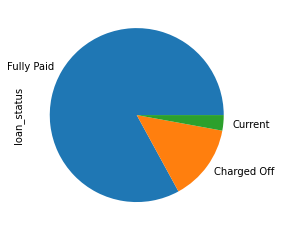

In [41]:
loan["loan_status"].value_counts()
loan["loan_status"].value_counts().plot.pie()

###Observation:
1.   The dataset has more members who non-defaulters than defaulters
2.   The values we are concerned for our analysis is Charged off and Fully Paid
3.   The rews with Loan Status = Current is of no significance for our analysis


###**Remove row with loan status = Current**

<AxesSubplot:ylabel='loan_status'>

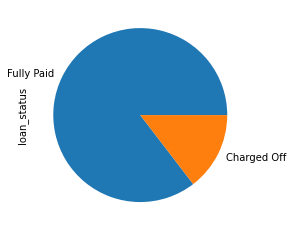

In [42]:
loan = loan[loan["loan_status"] != 'Current']
loan.loan_status.value_counts()
loan["loan_status"].value_counts().plot.pie()

## Unvariate Analysis on loan_amnt variable,funded_amnt,funded_amnt_inv

All these 3 variables are closely related but the amount that gets approved is **funded_amnt_inv**




count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


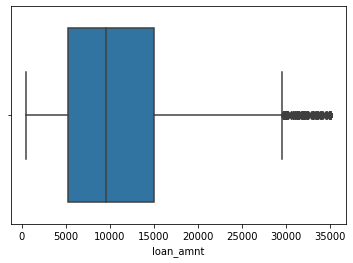

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


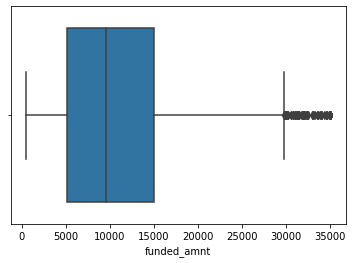

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


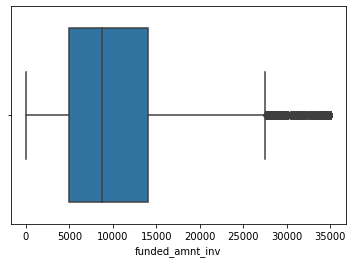

In [43]:
#Unvariate Analysis on loan_amnt variable
print(loan["loan_amnt"].describe())
sns.boxplot(x=loan["loan_amnt"])
plt.show()
print(loan["funded_amnt"].describe())
sns.boxplot(x=loan["funded_amnt"])
plt.show()
print(loan["funded_amnt_inv"].describe())
sns.boxplot(x=loan["funded_amnt_inv"])
plt.show()

**Conclusion:**
anything above 95 percentile is considered outlier (25K)

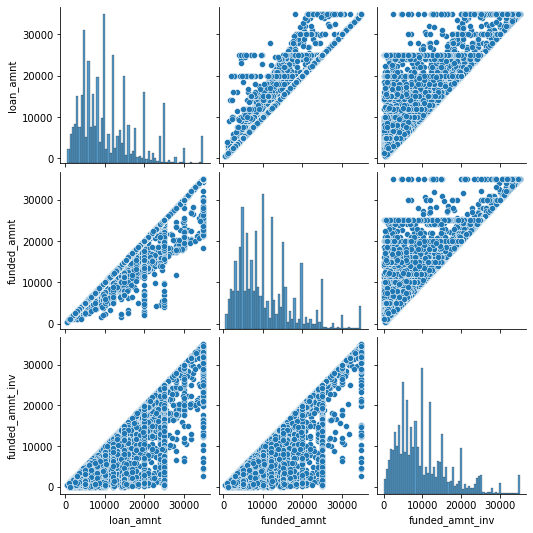

In [44]:
sns.pairplot(loan[["loan_amnt","funded_amnt","funded_amnt_inv"]])

### **Observation:** The columns loan_amnt variable,funded_amnt,funded_amnt_inv follow the same trend, as of now it (through univariate analysis) doesnot give any trend.The only trend that we see is all the three continuous variables follow the same histogram plot trend

25 to 75 percent of funded loan amount is between 5000 to 15000


25%       5200
50%       9550
75%      15000

All these 3 variables are closely related but the amount that gets approved is **funded_amnt_inv**

For further analysis we will use **funded_amnt_inv**

##Segmented Univariate Analysis of loan status using funded_Amnt_Inv_category (derived metric):

loan_status               Charged Off  Fully Paid
funded_amnt_inv_category                         
fa2[0.0-10.0]K               0.138165    0.861835
fa3[10.0-20.0]K              0.145584    0.854416
fa4[20.0-30.0]K              0.171026    0.828974
fa5[30.0-40.0]K              0.213457    0.786543


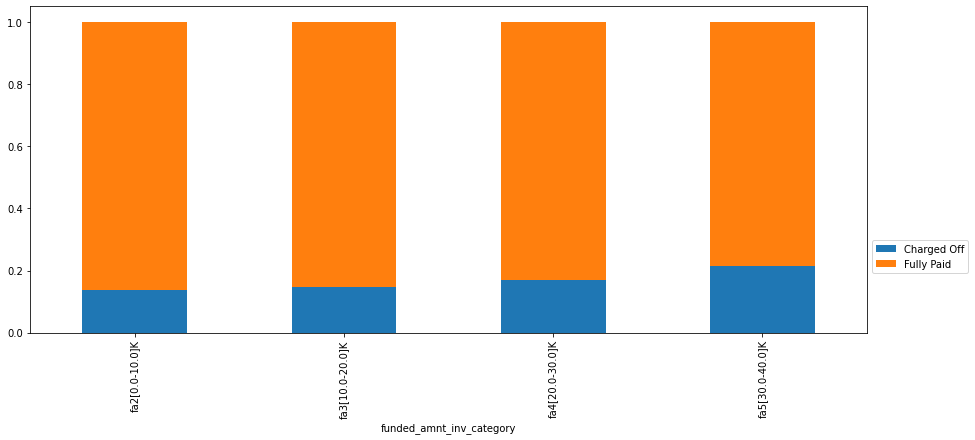

In [45]:
vs = pd.pivot_table(data=loan[loan["loan_status"] != 'Current'],values="id",index="funded_amnt_inv_category",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
#vs.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

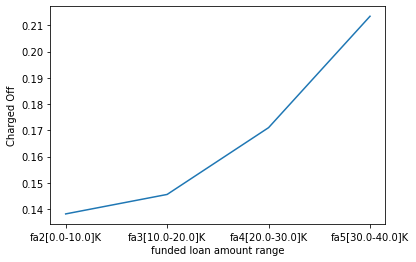

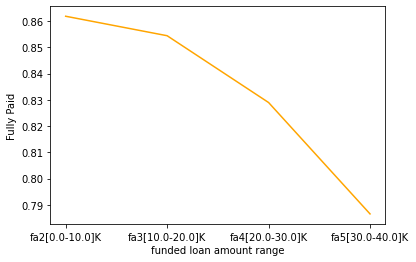

In [46]:
plt.plot(vs_per.reset_index()["funded_amnt_inv_category"], vs_per.reset_index()["Charged Off"])
plt.xlabel('funded loan amount range')
plt.ylabel('Charged Off')
plt.show()
plt.plot(vs_per.reset_index()["funded_amnt_inv_category"], vs_per.reset_index()["Fully Paid"],color = 'orange')
plt.xlabel('funded loan amount range')
plt.ylabel('Fully Paid')
plt.show()

##Unvariate Analysis on variable "term"

<AxesSubplot:xlabel='term', ylabel='count'>

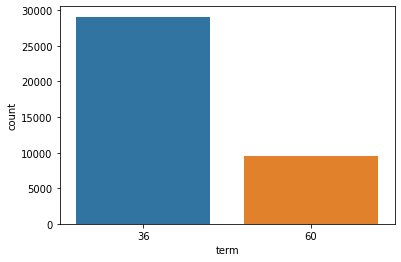

In [47]:
loan["term"].value_counts()
sns.countplot(loan["term"])

### *Conclusion:* 
1. There are only 2 kinds of loan terms available i.e. 36 months and 60 months.
2. 36 months loan term seems to be the popular one

##Segmented Univariate Analysis of loan status using terms:

loan_status  Charged Off  Fully Paid
term                                
36              0.110909    0.889091
60              0.253138    0.746862


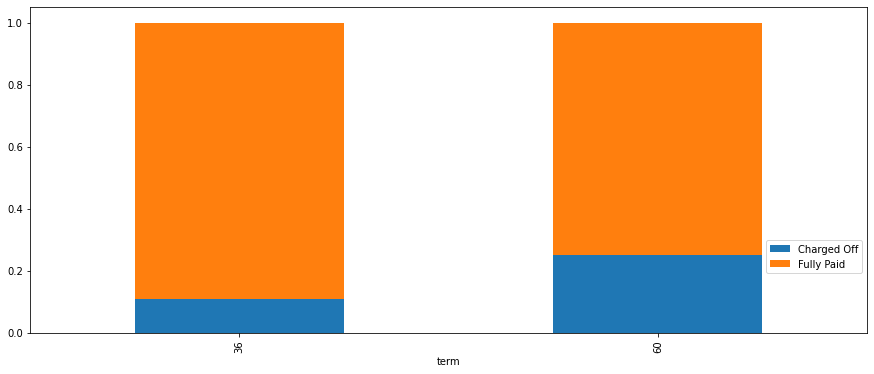

In [48]:
vs = pd.pivot_table(data=loan[loan["loan_status"] != 'Current'],values="id",index="term",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

### **Observation:**
60 months term is more likely to be charged off in comparison to 36 months


Lower the loan terms lower the chances of loan amount being charged off
Higher the loan terms higher the chances of loan amount being charged off

5 years is a bigger term in comparison to 3 years, lot of factors change in these extra 2 years. Recession might come in, loss of job, annual income might come down, relocating to a higher cost of living city, increase in home rents, inflation, change in government, new regulations  are all possible reasons for increase in number of loan defaulter with higher loan terms

**Recommendations:**

Incase there are other variables showing red flags, then the lender can go for a shorter term considering factors like the current annual income is high or if one foresee a recession or rise in real estate price in the current locality



## Univariate Analysis on "int_rate"

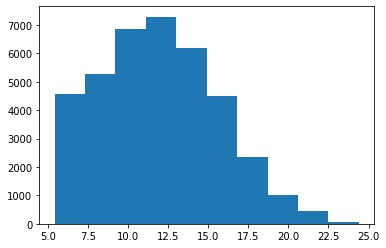

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


<AxesSubplot:xlabel='int_rate'>

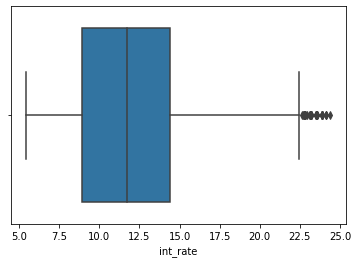

In [49]:
loan["int_rate"]
#rng = np.arange(0,36000,2000)
plt.hist(loan["int_rate"])
plt.show()
print(loan["int_rate"].describe())
sns.boxplot(x=loan["int_rate"])

##Segmented Univariate Analysis of loan status using interest_category (derived metric):

loan_status        Charged Off  Fully Paid
interest_category                         
ir3[5.0-10.0]         0.059645    0.940355
ir4[10.0-15.0]        0.136650    0.863350
ir5[15.0-20.0]        0.222642    0.777358
ir6[20.0-25.0]        0.361032    0.638968
ir7[25.0-30.0]        0.500000    0.500000


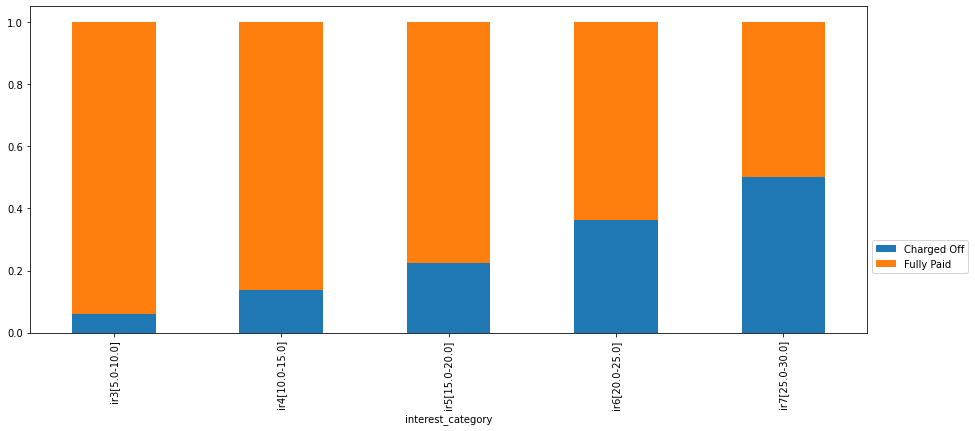

In [50]:
vs = pd.pivot_table(data=loan[loan["loan_status"] != 'Current'],values="id",index="interest_category",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

### **Observation:**
As the interest rates go higher the chances of loan being defaulted is high
The Lenders here are doing the correct thing by increasing the interest rates of risky loan requests in order to mitigate the risk of loan defaulting
Average interest rates for small business is around 13% and it has appeared loans for small business are at higher risks of defaulting

**Recommendations:**
Further increase the interest rates for risky loans for purposes like small business (may be around 20 to 25% range)


## Univariate Analysis on "installment"

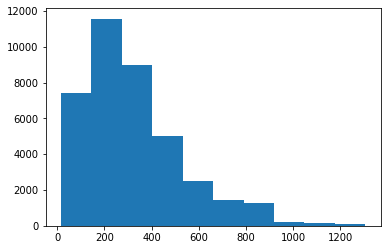

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64


<AxesSubplot:xlabel='installment'>

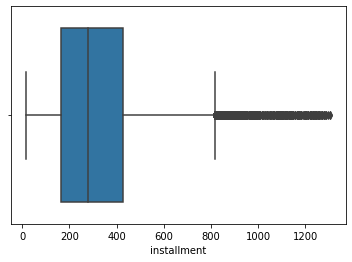

In [51]:
loan["installment"]
#rng = np.arange(0,36000,2000)
plt.hist(loan["installment"])
plt.show()
print(loan["installment"].describe())
sns.boxplot(x=loan["installment"])

##Segmented Univariate Analysis of loan status using monthly installment (derived metric):

loan_status                   Charged Off  Fully Paid
monthly_installment_category                         
Inst10[800.0-900.0]              0.166667    0.833333
Inst2[0.0-100.0]                 0.150337    0.849663
Inst3[100.0-200.0]               0.133502    0.866498
Inst4[200.0-300.0]               0.140115    0.859885
Inst5[300.0-400.0]               0.140006    0.859994
Inst6[400.0-500.0]               0.154040    0.845960
Inst7[500.0-600.0]               0.166857    0.833143
Inst8[600.0-700.0]               0.163727    0.836273
Inst9[700.0-800.0]               0.168675    0.831325


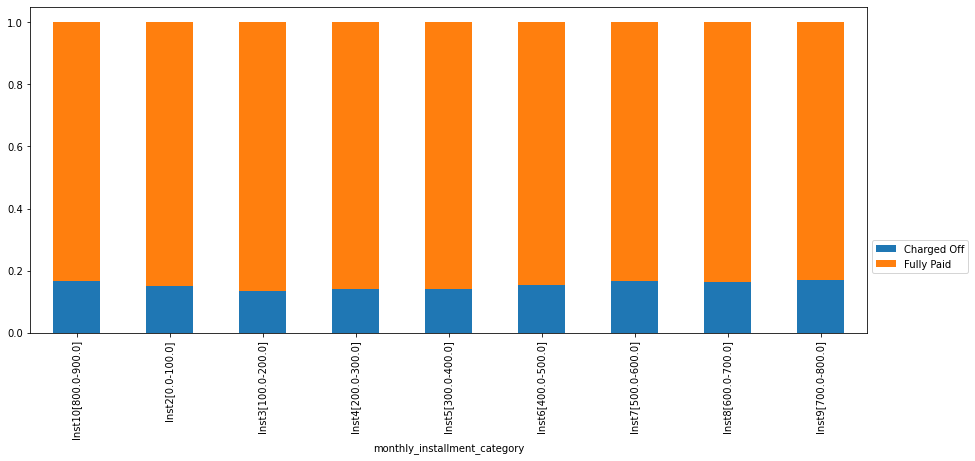

In [52]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current') & (loan["installment"] < 800)],values="id",index="monthly_installment_category",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

###Observation
Monthly installments have no direct impact on defaulting or not defaulting loan payment

## Univariate Analysis of Grade

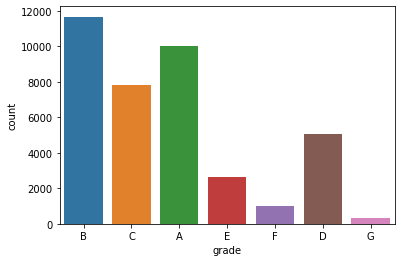

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [53]:
sns.countplot(loan["grade"])
plt.show()
loan["grade"].value_counts()

### Segmented Univariate Analysis of "grade" using "sub_grade"

In [54]:
#As the sub grades are A1,A2,A3,A4,A5 for grade A and similarly for B it is B1,B2,B3,B4,B5
#let us add a new column numeric_sub_grade...which has values like 1,2,3,4,5
#This will make our stacked bar chart look better for segmented univariate analysis
loan["numeric_sub_grade"] = loan["sub_grade"].apply(lambda x: x[1:])
loan[["sub_grade","numeric_sub_grade"]]

,sub_grade,numeric_sub_grade
0,B2,2
1,C4,4
2,C5,5
3,C1,1
5,A4,4
...,...,...
39712,A4,4
39713,C1,1
39714,A4,4
39715,A2,2


numeric_sub_grade     1     2     3     4     5
grade                                          
A                  1139  1508  1810  2873  2715
B                  1797  2001  2825  2437  2615
C                  2055  1931  1488  1206  1154
D                   931  1286  1116   918   834
E                   722   614   516   424   387
F                   305   233   174   151   113
G                    94    77    45    54    29


<AxesSubplot:xlabel='grade'>

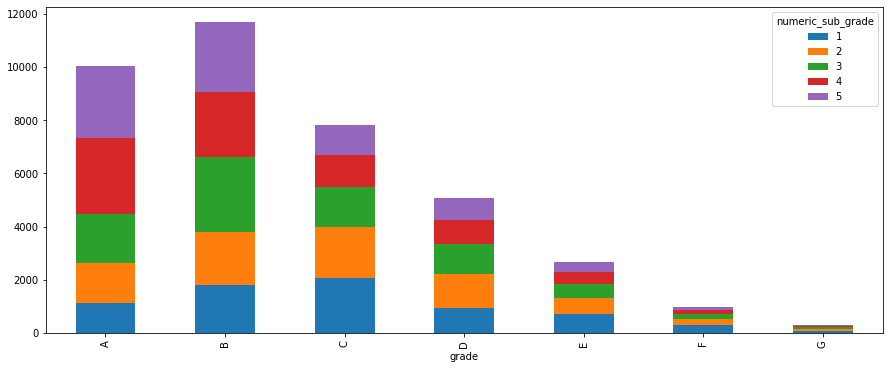

In [55]:
pt = pd.pivot_table(data=loan,values="id",index="grade",columns="numeric_sub_grade",aggfunc=len).fillna(0).astype('int')
print(pt)
pt.plot(kind="bar",stacked="True",figsize=[15,6])

numeric_sub_grade         1         2         3         4         5
grade                                                              
A                  0.113390  0.150124  0.180189  0.286013  0.270284
B                  0.153919  0.171392  0.241970  0.208737  0.223983
C                  0.262318  0.246490  0.189941  0.153944  0.147307
D                  0.183088  0.252901  0.219469  0.180531  0.164012
E                  0.271123  0.230567  0.193766  0.159219  0.145325
F                  0.312500  0.238730  0.178279  0.154713  0.115779
G                  0.314381  0.257525  0.150502  0.180602  0.096990


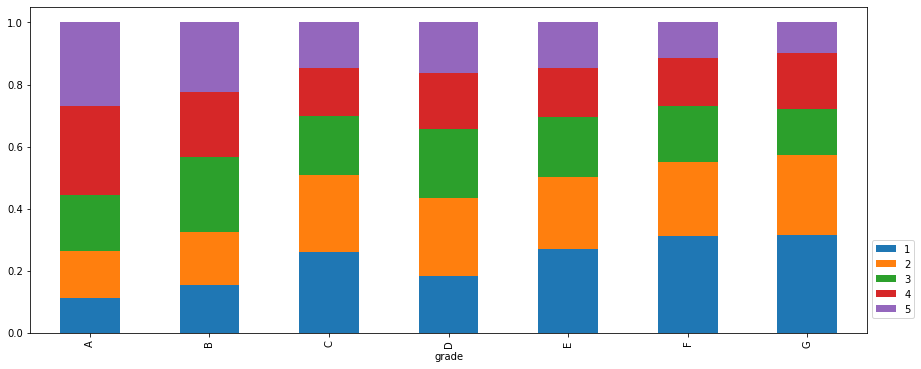

In [56]:
pt_per = pt[["1","2","3","4","5"]].apply(lambda x: x/x.sum(),axis=1)
print(pt_per)
pt_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

##Segmented Univariate Analysis of loan status using grade:

loan_status  Charged Off  Fully Paid
grade                               
A               0.059930    0.940070
B               0.122056    0.877944
C               0.171943    0.828057
D               0.219862    0.780138
E               0.268494    0.731506
F               0.326844    0.673156
G               0.337793    0.662207


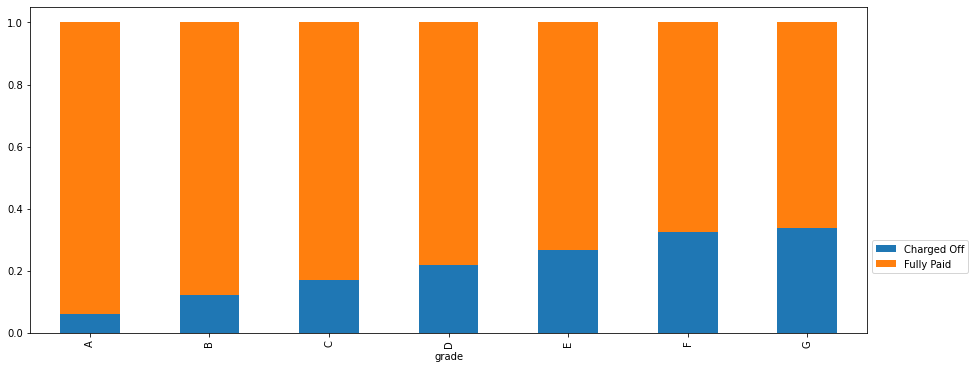

In [57]:
vs = pd.pivot_table(data=loan[loan["loan_status"] != 'Current'],values="id",index="grade",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

###**Observation:**
As the grade moves from A to G, the defaulter percentage increases.
There seems to be some correlation between the grades and charged-off loans

As we move from lower grade A to higher grade G, there is a good spike in the ratio of number of charged off members to number fully paid members
Similarly, as we move from lower grade A to higher grade G, there is a good decline in the ratio of number fully paid members  to number of charged off members
So, chances of defaulting increases with higher grades and lower grades ensures higher possibilities of loan payment
Similar trend is seen among sub grades within grades. Within a Grade, even if we move from 1 to 5 sub grade, the possibility of defaulting a loan is higher (in maximum case)


##Segmented Univariate Analysis of loan status using sub_grade:

loan_status  Charged Off  Fully Paid
sub_grade                           
A1              0.026339    0.973661
A2              0.049072    0.950928
A3              0.056906    0.943094
A4              0.061956    0.938044
A5              0.079926    0.920074
B1              0.095159    0.904841
B2              0.113943    0.886057
B3              0.120708    0.879292
B4              0.135002    0.864998
B5              0.136138    0.863862
C1              0.163504    0.836496
C2              0.166235    0.833765
C3              0.181452    0.818548
C4              0.175788    0.824212
C5              0.180243    0.819757
D1              0.179377    0.820623
D2              0.210731    0.789269
D3              0.229391    0.770609
D4              0.234205    0.765795
D5              0.250600    0.749400
E1              0.274238    0.725762
E2              0.265472    0.734528
E3              0.230620    0.769380
E4              0.297170    0.702830
E5              0.281654    0.718346
F

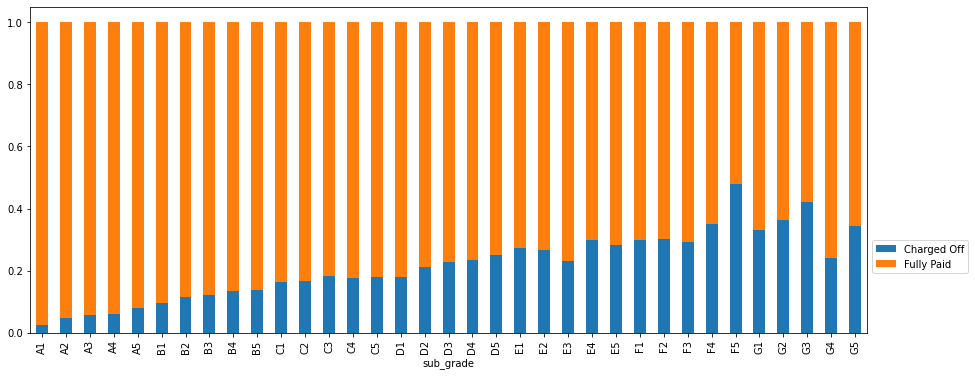

In [58]:
vs = pd.pivot_table(data=loan[loan["loan_status"] != 'Current'],values="id",index="sub_grade",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

###Observation:
Even within grades, when the sub-grades grows in level, the number of defaulters are increasing in most of the case.If you focus on blue line

## Univariate Analysis of "emp_length"





 10    8488
 0     4508
 2     4291
 3     4012
 4     3342
 5     3194
 1     3169
 6     2168
 7     1711
 8     1435
 9     1226
-1     1033
Name: emp_length, dtype: int64


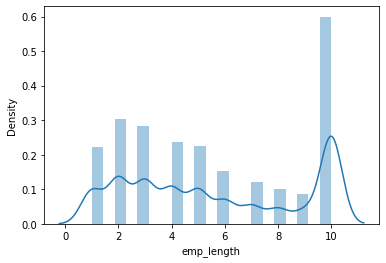

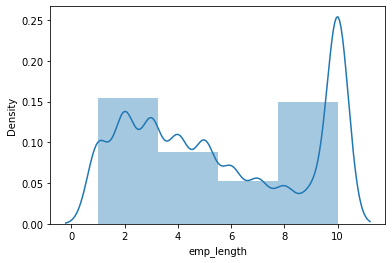

In [59]:
print(loan["emp_length"].value_counts())
sns.distplot(loan[loan["emp_length"] > 0]["emp_length"])
plt.show()
sns.distplot(loan[loan["emp_length"] > 0]["emp_length"],bins=4)
plt.show()

### Observation:
There are more people with 10+ years with a single employer

let us assume current stability of job is based on the length of employment with the current employer
[1.00 - 3.25] - low stability
[3.25 - 5.50] - moderate stability
[5.50 - 7.75] - Very Stable
[7.75 - 10.00] - High stability

The distribution predominant in the first and last category.
Either low stability or high stability

##Segmented Univariate Analysis of loan status using emp_length

loan_status  Charged Off  Fully Paid
emp_length                          
-1              0.220716    0.779284
 0              0.141748    0.858252
 1              0.143894    0.856106
 2              0.132137    0.867863
 3              0.138335    0.861665
 4              0.138241    0.861759
 5              0.143394    0.856606
 6              0.141605    0.858395
 7              0.153711    0.846289
 8              0.141463    0.858537
 9              0.128874    0.871126
 10             0.156810    0.843190


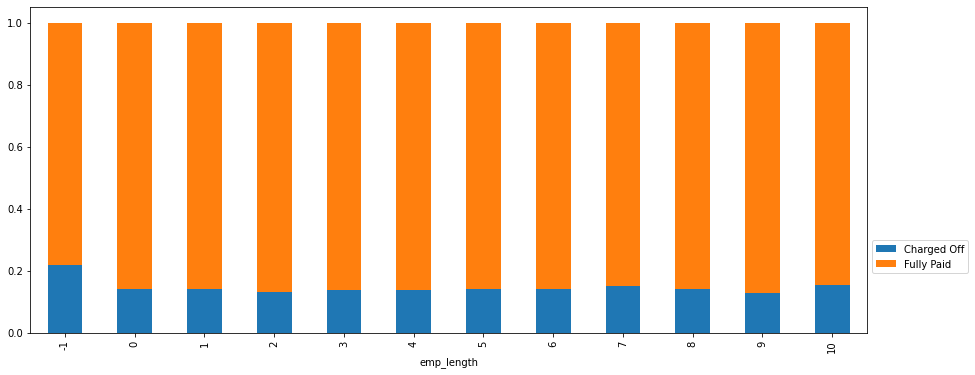

In [60]:
vs = pd.pivot_table(data=loan[loan["loan_status"] != 'Current'],values="id",index="emp_length",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

### **Observation:**
No trends detected...Not a driver variable

##Univariate Analysis of "home_ownership"

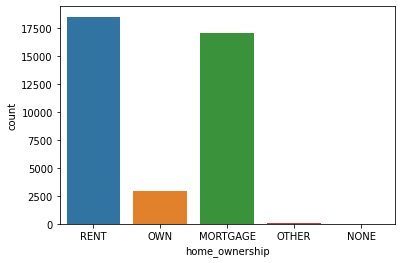

percentage distribution


RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

In [61]:
sns.countplot(loan["home_ownership"])
plt.show()
print('percentage distribution')
loan["home_ownership"].value_counts(normalize = True) * 100

### Observation
1.   Maximum member's home ownership status from the dataset is either RENT (47.5%) or MORTGAGE. (44.5%)
2.   Very few people own home : 7.69%



##Segmented Univariate Analysis of loan status using home_ownership

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE           0.136713    0.863287
NONE               0.000000    1.000000
OTHER              0.183673    0.816327
OWN                0.148908    0.851092
RENT               0.153626    0.846374


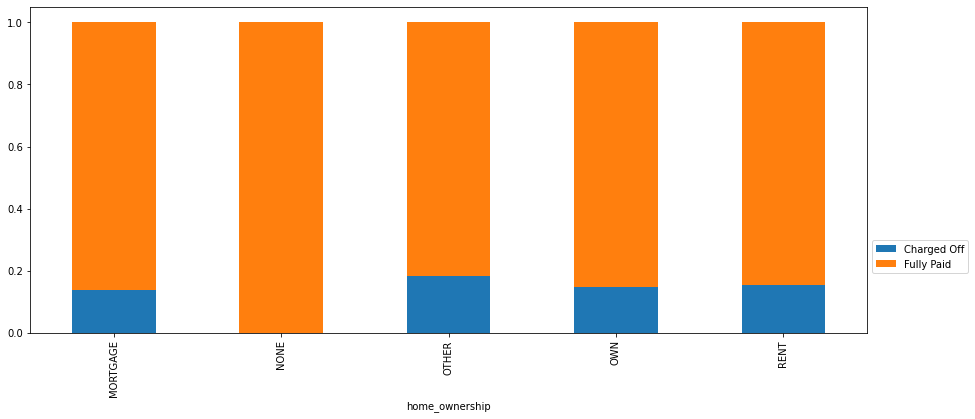

In [62]:
vs = pd.pivot_table(data=loan[loan["loan_status"] != 'Current'],values="id",index="home_ownership",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

###Observation:

Applicant's who own home are at lower risks of defaulting.

But, not a strong trend established

##Segmented Univariate Analysis of loan status using annual_inc_category (derived metric):

loan_status          Charged Off  Fully Paid
annual_inc_category                         
Inc2[0.0-20.0]K         0.221491    0.778509
Inc3[20.0-40.0]K        0.176271    0.823729
Inc4[40.0-60.0]K        0.153178    0.846822
Inc5[60.0-80.0]K        0.141711    0.858289
Inc6[80.0-100.0]K       0.121147    0.878853
Inc7[100.0-120.0]K      0.102564    0.897436


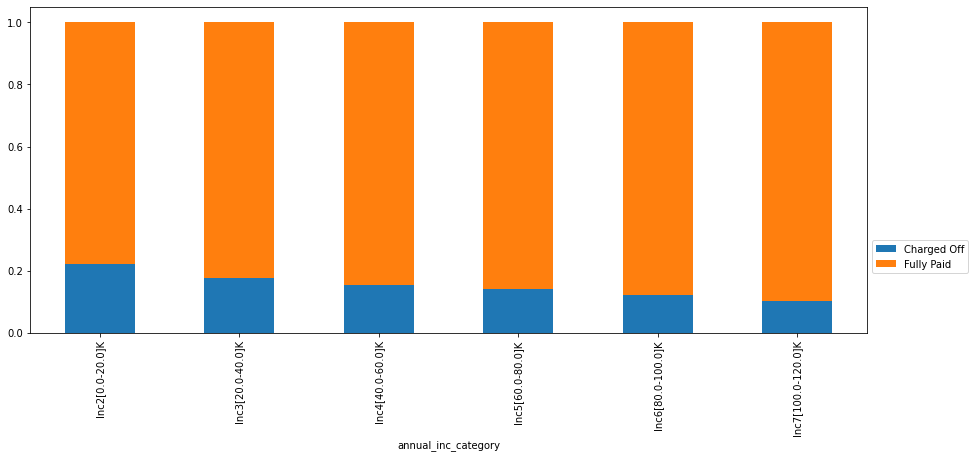

In [63]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current') & (loan["annual_inc"] < 100000)],values="id",index="annual_inc_category",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

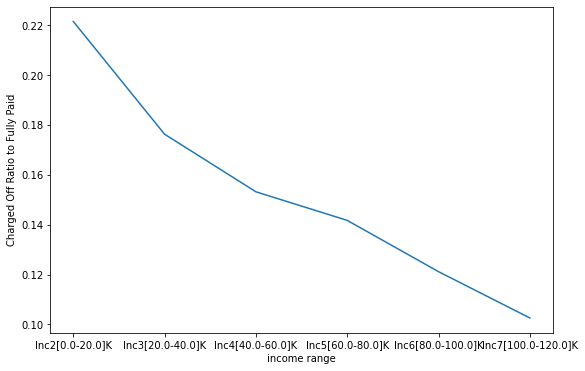

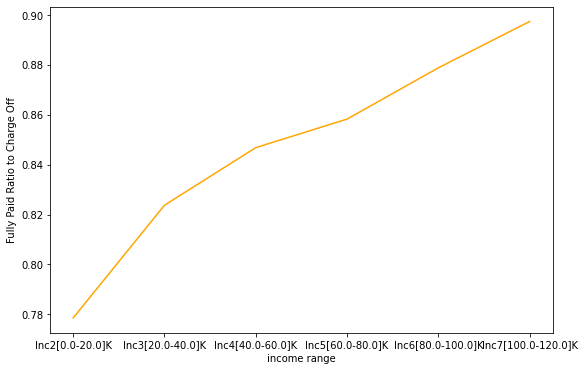

In [64]:
plt.figure(figsize=[9,6])
plt.plot(vs_per.reset_index()["annual_inc_category"], vs_per.reset_index()["Charged Off"])
plt.xlabel('income range')
plt.ylabel('Charged Off Ratio to Fully Paid')
plt.show()
plt.figure(figsize=[9,6])
plt.plot(vs_per.reset_index()["annual_inc_category"], vs_per.reset_index()["Fully Paid"],color = 'orange')
plt.xlabel('income range')
plt.ylabel('Fully Paid Ratio to Charge Off')
plt.show()

###Observation:
As the income range increases, the chances of defaulting decreases.

From the lowest income range to hisghest income range, the defaulter percentage declined from 20% to 11%

As we move from one lower income bucket to next higher income bucket , there is a decline in chance of defaulting by 2.3%  approximately 

##Univariate Analysis of verification status

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

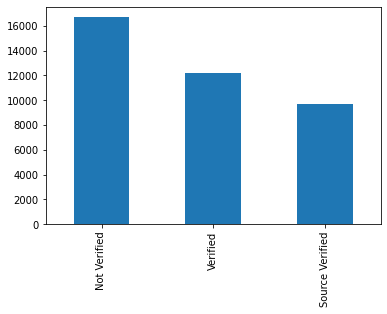

In [65]:
loan["verification_status"].value_counts().plot.bar()
loan["verification_status"].value_counts()

##Segmented Univariate Analysis of loan status usning verification status

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified            0.128310    0.871690
Source Verified         0.148186    0.851814
Verified                0.168032    0.831968


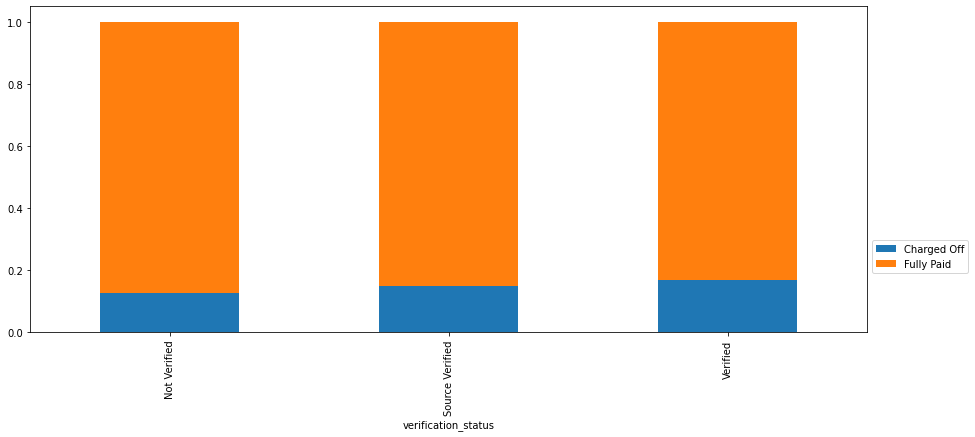

In [66]:
vs = pd.pivot_table(data=loan[loan["loan_status"] != 'Current'],values="id",index="verification_status",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

###Observation
The above chart clearly shows the members with verified sources are more likely to default in comparison to non-verified sources, which is really strange as the purpose of verification is to reduce the number of defaulters

**Recommendations:** 

FRAUD ALERT: AUDIT YOUR VERIFICATION INTERNAL DEPARTMENT/PARTNERS/EXTERNAL SOURCES, IF GUILTY CHANGE THEM









##Segmented Univariate Analysis of loan status using issue date - month and year (derived metric):

loan_status   Charged Off  Fully Paid
issue_d_year                         
07               0.179283    0.820717
08               0.158131    0.841869
09               0.125954    0.874046
10               0.128772    0.871228
11               0.158705    0.841295


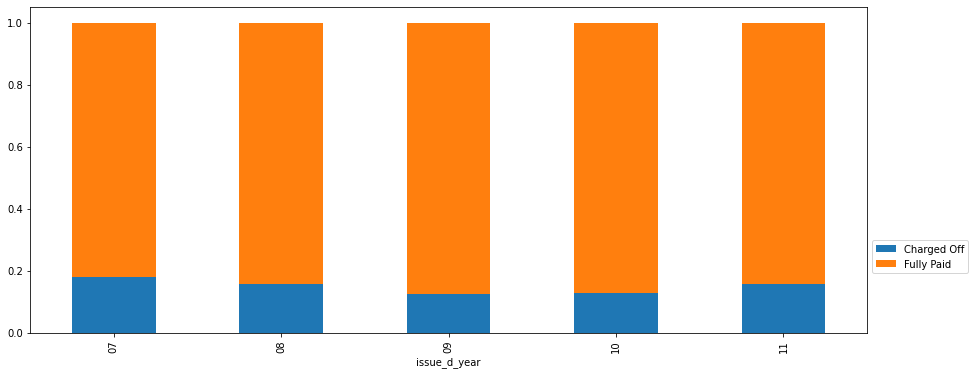

In [67]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current')],values="id",index="issue_d_year",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

###Observation:
No specific trend is observed here

##Segmented Univariate Analysis of loan status using purpose:

loan_status         Charged Off  Fully Paid
purpose                                    
major_purchase         0.103256    0.896744
wedding                0.103672    0.896328
car                    0.106738    0.893262
credit_card            0.107818    0.892182
home_improvement       0.120696    0.879304
vacation               0.141333    0.858667
debt_consolidation     0.153254    0.846746
medical                0.155653    0.844347
moving                 0.159722    0.840278
house                  0.160763    0.839237
other                  0.163777    0.836223
educational            0.172308    0.827692
renewable_energy       0.186275    0.813725
small_business         0.270810    0.729190


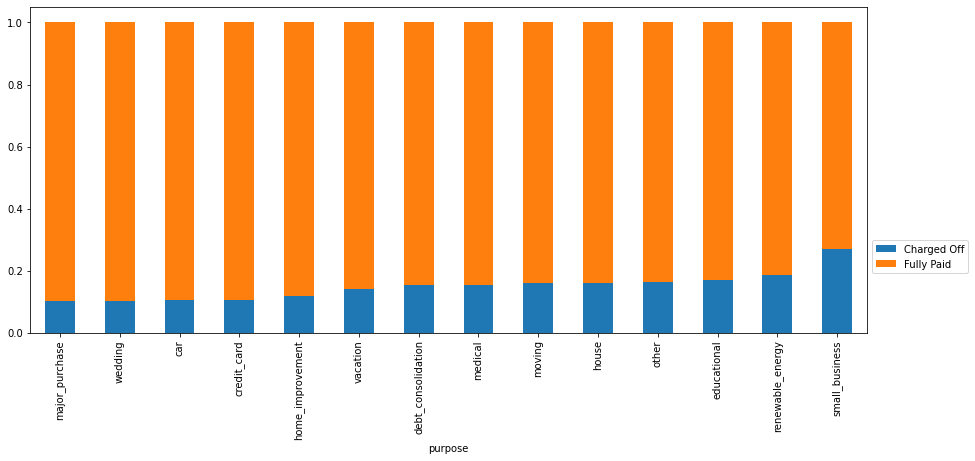

In [68]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current')],values="id",index="purpose",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1).sort_values('Charged Off', ascending = True)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()

###Observation:
We clearly see in the above plot that loans taken for certain purpose are higher risks of defaulting in comparison to loans taken for certain other purposes.

Example: loans taken for small businesses are higher risks in comparison loans taken for wedding or car

##Univariate Analysis of addr_state:

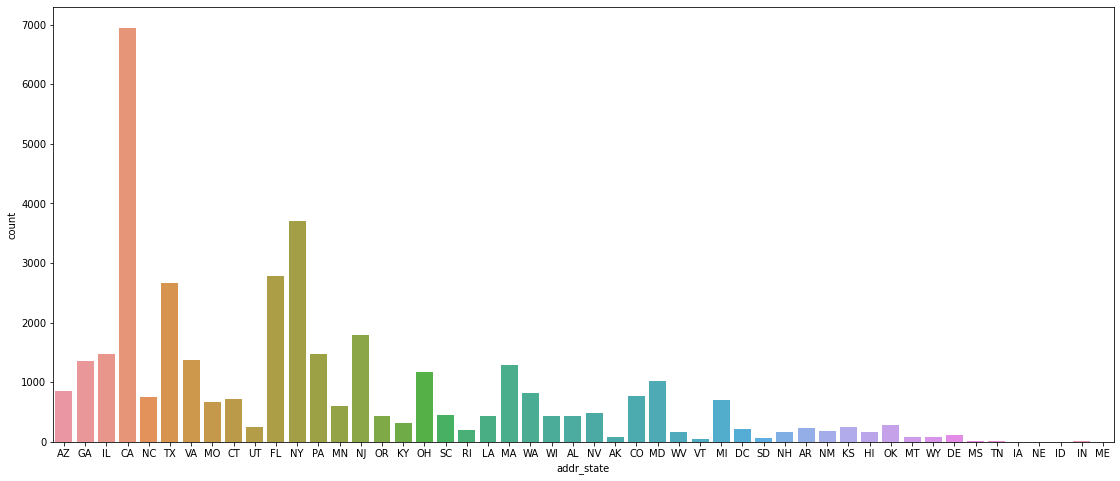

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [69]:
plt.figure(figsize=[19,8])
sns.countplot(loan["addr_state"])
plt.show()
loan["addr_state"].value_counts()

###Observation:
States with greater than 300 members will be could for analysis purpose.

While doing Bivariate analaysis, we will ignore the states with member count lesser than 1000

##Segmented Univariate Analysis of loan status using addr_state:

In [70]:
addr_state_count = pd.DataFrame(loan["addr_state"].value_counts().reset_index())
addr_state_count.rename(columns = {'addr_state':'count_members', 'index':'state_code'}, inplace = True)

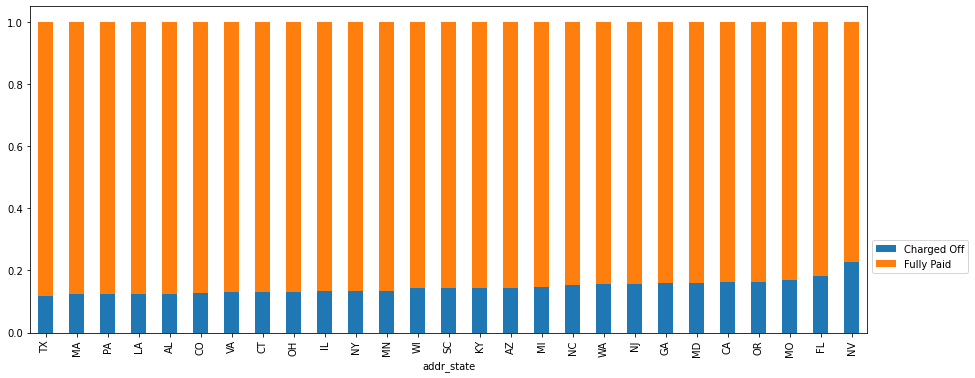

loan_status  Charged Off  Fully Paid
addr_state                          
TX              0.118842    0.881158
MA              0.122591    0.877409
PA              0.122616    0.877384
LA              0.124122    0.875878
AL              0.124138    0.875862
CO              0.127937    0.872063
VA              0.129291    0.870709
CT              0.129477    0.870523
OH              0.131579    0.868421
IL              0.133288    0.866712
NY              0.133856    0.866144
MN              0.133884    0.866116
WI              0.143182    0.856818
SC              0.143791    0.856209
KY              0.144695    0.855305
AZ              0.144876    0.855124
MI              0.146307    0.853693
NC              0.152000    0.848000
WA              0.155257    0.844743
NJ              0.155307    0.844693
GA              0.158205    0.841795
MD              0.158358    0.841642
CA              0.161894    0.838106
OR              0.163218    0.836782
MO              0.170149    0.829851
F

In [71]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current') & (loan["addr_state"].isin(np.array(addr_state_count[addr_state_count["count_members"] >= 300]["state_code"])))],values="id",index="addr_state",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1).sort_values('Charged Off', ascending = True)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()
#print(vs)
print(vs_per)

###Observation:
Members of Certain states like Florida, Nevada and Missouri are at higher risk of being a loan defaulter

Members of Certain states like Texas, Massachusetts, Pennsylvania are at lower risks

Cost of living in particular state (and in a particular city) can have relate to loan defaulting.

Let us have a look at one of the highly loan defaulting state Florida and figure out which zipcode is having more defaulter percentage

Let us further analyse the states like Florida - as it has a decent dataset size and see the zipcodes with greater risks of defaulting

Here we are only considering Florida zipcodes with more than 100 members to have an effective analysis

Here we have eliminated Florida dataset with zip codes lesser than 100 members

In [72]:
#Here we have eliminated Florida dataset with zip codes lesser than 100 members
zip_code_count = pd.DataFrame(loan[loan["addr_state"] == 'FL']["zip_code"].value_counts().reset_index())
zip_code_count.rename(columns = {'zip_code':'count_members', 'index':'zip_code'}, inplace = True)
np.array(zip_code_count[zip_code_count["count_members"] >= 100]["zip_code"])

array(['331xx', '330xx', '334xx', '328xx', '333xx', '327xx', '336xx',
       '322xx', '335xx', '337xx'], dtype=object)

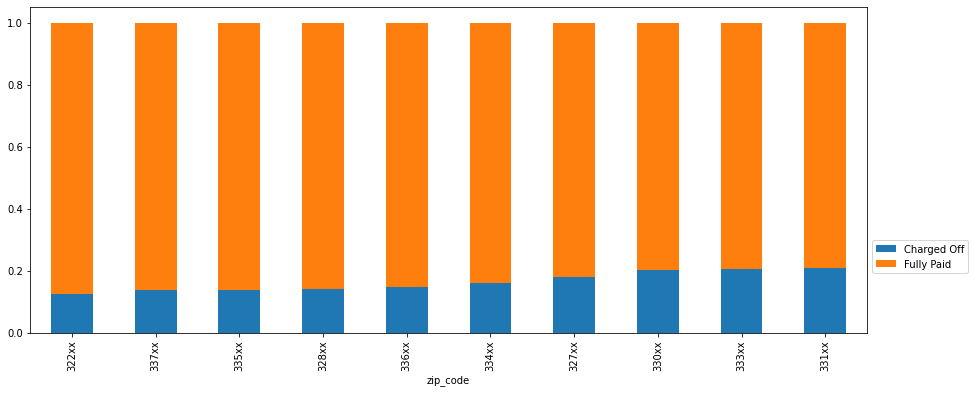

loan_status  Charged Off  Fully Paid
zip_code                            
322xx                 16         110
327xx                 26         117
328xx                 24         145
330xx                 51         198
331xx                 70         266
333xx                 33         126
334xx                 37         191
335xx                 17         104
336xx                 19         109
337xx                 16          99
loan_status  Charged Off  Fully Paid
zip_code                            
322xx           0.126984    0.873016
337xx           0.139130    0.860870
335xx           0.140496    0.859504
328xx           0.142012    0.857988
336xx           0.148438    0.851562
334xx           0.162281    0.837719
327xx           0.181818    0.818182
330xx           0.204819    0.795181
333xx           0.207547    0.792453
331xx           0.208333    0.791667


In [73]:
#Here we have eliminated Florida dataset with zip codes lesser than 100 members
#In below code you will see a filter on state code 'FL' and member count > 100 for better analysis of data
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current') & (loan["addr_state"] == 'FL')  & (loan["zip_code"].isin(np.array(zip_code_count[zip_code_count["count_members"] >= 100]["zip_code"])))],values="id",index="zip_code",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1).sort_values('Charged Off', ascending = True)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()
print(vs)
print(vs_per)

###Observation:
322XX is Jacksonville FL which is at a lower risk of defaulting 

where as

331XX is Miami is at higher risk of defaulting

The cost of living in Miami, FL is 20.5% higher than in Jacksonville, FL
Employers in Miami, FL typically pay 2.7% more than employeers in Jacksonville, FL for the same type of job

##Univariate Analysis of dti:

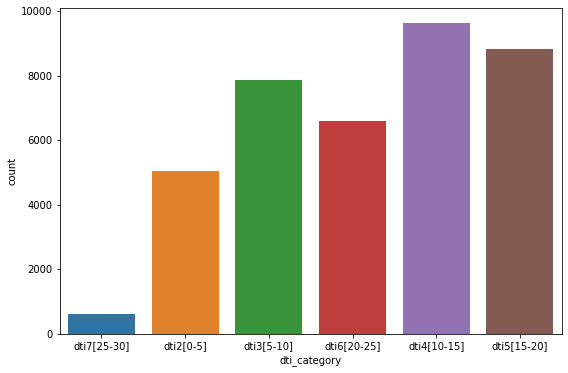

dti4[10-15]    9624
dti5[15-20]    8824
dti3[5-10]     7861
dti6[20-25]    6599
dti2[0-5]      5044
dti7[25-30]     625
Name: dti_category, dtype: int64

In [74]:
plt.figure(figsize=[9,6])
sns.countplot(loan["dti_category"])
plt.show()
loan["dti_category"].value_counts()

###Observation
Oulier detection: The dti range [25 - 30] has very low member count in comparison to other ranges in the above plot

##Segmented Univariate Analysis of loan status using dti_category (derived metric):

loan_status   Charged Off  Fully Paid
dti_category                         
dti2[0-5]        0.123910    0.876090
dti3[5-10]       0.127337    0.872663
dti4[10-15]      0.145366    0.854634
dti5[15-20]      0.157978    0.842022
dti6[20-25]      0.169874    0.830126


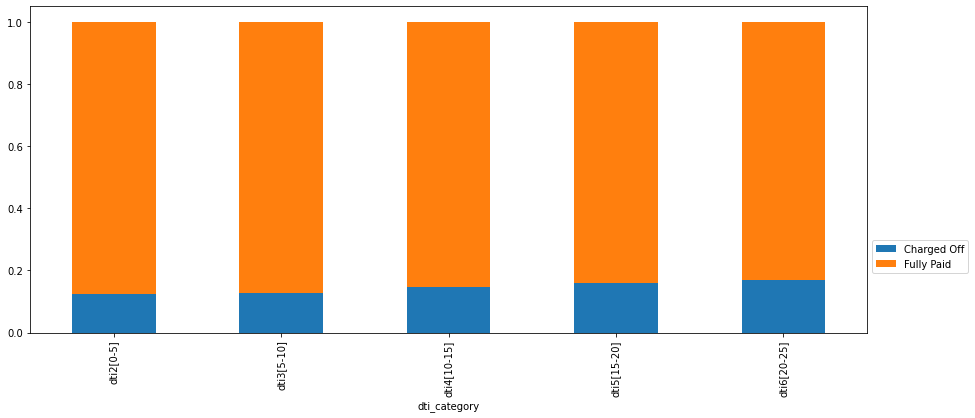

In [75]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current') & (loan["dti_category"] != 'dti7[25-30]')],values="id",index="dti_category",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
#print(vs)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
#vs.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()


###Observation:
This shows as dti increases the members chances of defaulting a loan also increases.

The bar chart doesnot clearly show the hike in chances of defaulting when the dti increases.

Let us switch to line chart for the same dataset





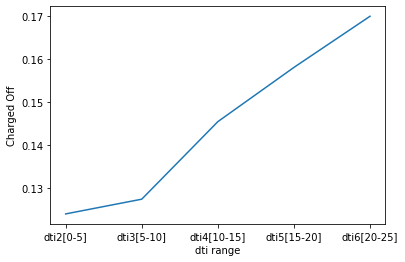

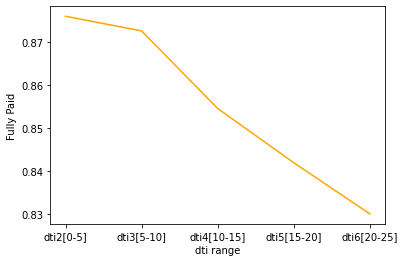

In [76]:
plt.plot(vs_per.reset_index()["dti_category"], vs_per.reset_index()["Charged Off"])
plt.xlabel('dti range')
plt.ylabel('Charged Off')
plt.show()
plt.plot(vs_per.reset_index()["dti_category"], vs_per.reset_index()["Fully Paid"],color = 'orange')
plt.xlabel('dti range')
plt.ylabel('Fully Paid')
plt.show()

###Observation:
You can clearly see the rise in charged off percentage of the total members increases as the dti range increases.

This is another variable that shows clear impact on loan defaulting status

##Univariate Analysis of loan status using open_acc:

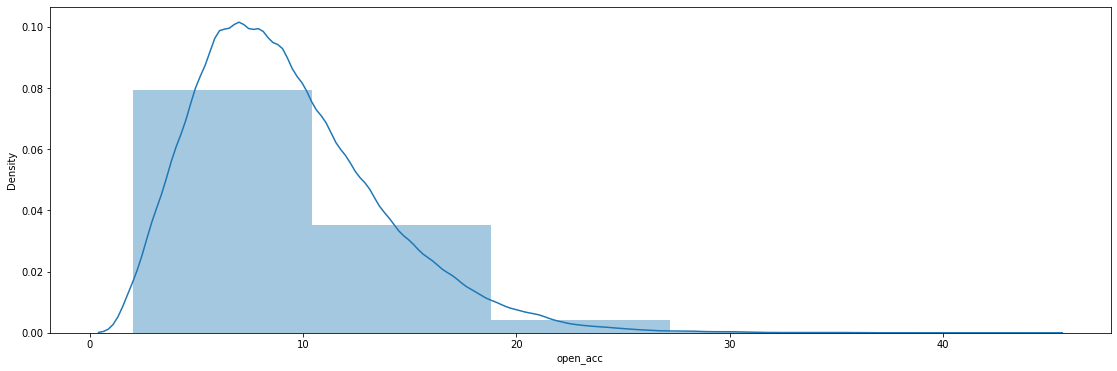

<AxesSubplot:xlabel='open_acc'>

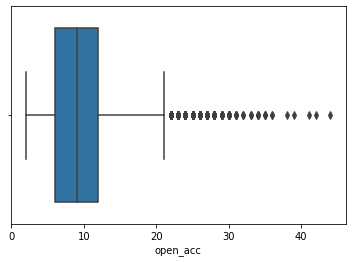

In [77]:
plt.figure(figsize=[19,6])
sns.distplot(loan["open_acc"],bins=5)
plt.show()
sns.boxplot(loan["open_acc"])
#loan["open_acc"].value_counts()

###Observation:
Clearly 0-10 is a bigger bucket

##Segmented Univariate Analysis of loan status using open_acc_category (derived metric):

loan_status        Charged Off  Fully Paid
open_acc_category                         
ou5[15-20]            0.136785    0.863215
ou3[5-10]             0.141576    0.858424
ou6[20-25]            0.143727    0.856273
ou4[10-15]            0.144801    0.855199
ou2[0-5]              0.171553    0.828447


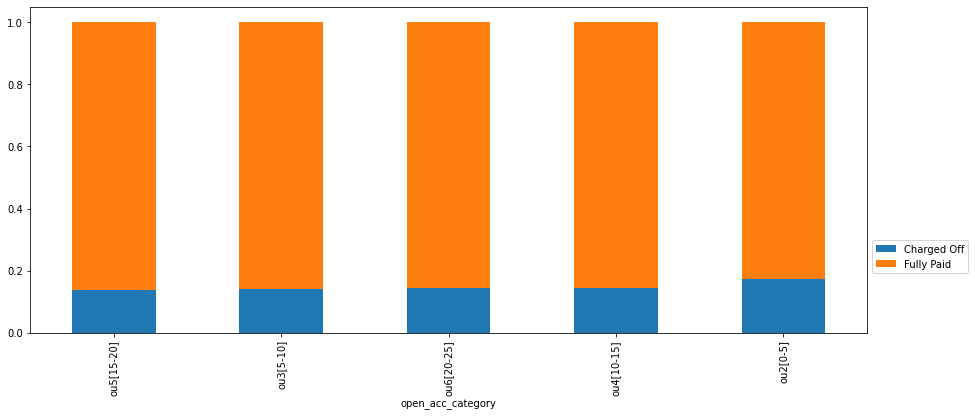

In [78]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current') & (loan["open_acc"] < 25)],values="id",index="open_acc_category",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
vs_per = vs_per.sort_values('Charged Off')
#print(vs)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
#vs.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()


###Observation:

No clear trends spotted...Not a driver variable

##Segmented Univariate Analysis of loan status using open_acc_total_per_range (derived metric):

loan_status               Charged Off  Fully Paid
open_acc_total_per_range                         
ot19[170-180]                0.000000    1.000000
ot6[40-50]                   0.135757    0.864243
ot4[20-30]                   0.138278    0.861722
ot5[30-40]                   0.139207    0.860793
ot3[10-20]                   0.146341    0.853659
ot7[50-60]                   0.148509    0.851491
ot8[60-70]                   0.153254    0.846746
ot11[90-100]                 0.161049    0.838951
ot10[80-90]                  0.165144    0.834856
ot12[100-110]                0.166667    0.833333
ot9[70-80]                   0.170624    0.829376
ot2[0-10]                    0.239130    0.760870


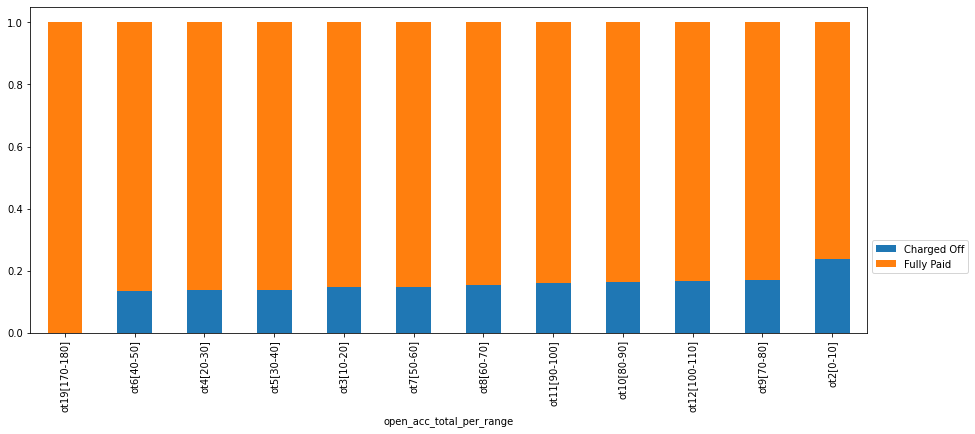

In [79]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current') & (loan["open_acc"] < 25)],values="id",index="open_acc_total_per_range",columns="loan_status",aggfunc=len).fillna(0).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
vs_per = vs_per.sort_values('Charged Off')
#print(vs)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
#vs.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()


###Observation:

No clear trends spotted...Not a driver variable

##Univariate Analysis of using pub_rec_bankruptcies:

In [80]:
loan["pub_rec_bankruptcies"].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

###Observation:
bankruptcies = 2 has very very few records and can be ignored while doing analysis 

##Segmented Univariate Analysis of loan status using pub_rec_bankruptcies:

loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                      0.141868    0.858132
1.0                      0.223580    0.776420
2.0                      0.400000    0.600000


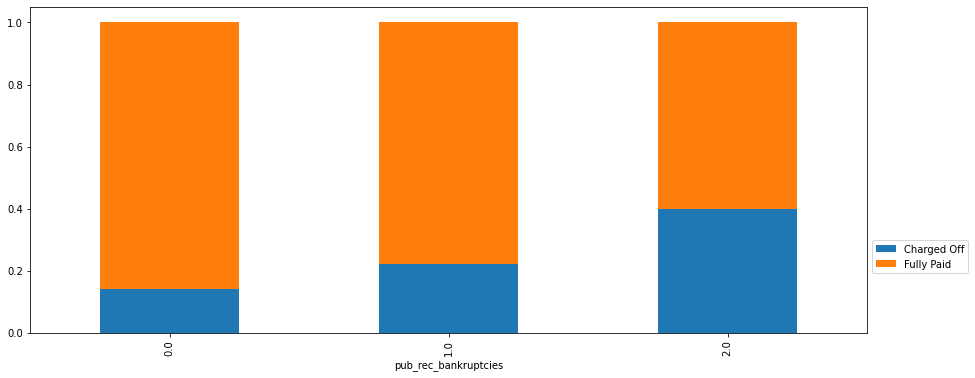

In [81]:
vs = pd.pivot_table(data=loan[(loan["loan_status"] != 'Current')],values="id",index="pub_rec_bankruptcies",columns="loan_status",aggfunc=len).astype('int')
vs_per = vs[["Charged Off","Fully Paid"]].apply(lambda x: x/x.sum(),axis=1)
vs_per = vs_per.sort_values('Charged Off')
#print(vs)
print(vs_per)
vs_per.plot(kind="bar",stacked="True",figsize=[15,6])
#vs.plot(kind="bar",stacked="True",figsize=[15,6])
plt.legend(bbox_to_anchor =(1, 0.3))
plt.show()


###Observation:
People without bancruptcies are less likely to be defaulters in comparison to people with bancruptcies

## From Univariate and Segmented univariate analysis it can be concluded that the following columns are strong indicators of default

* DTI
* Interest rate
* Purpose
* Grade
* Annual income
* Loan amount
* Term

and the key column is **Loan Status**


# **Bivariate Analysis:**



---


### Variables:
* Loan Amount Range
* Interest rate


---



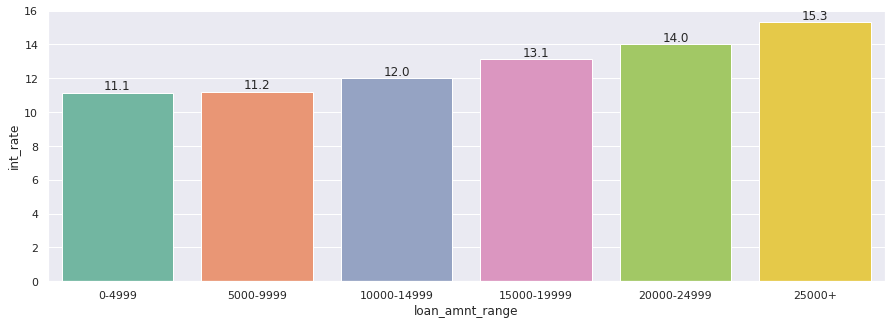

In [82]:
loan=loan[loan.loan_status!='Current']
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
bucket_l = ['0-4999', '5000-9999', '10000-14999', '15000-19999', '20000-24999','25000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=bucket_l)
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
add_labels_to_barplot_single('loan_amnt_range','int_rate')
plt.show()

### Obesrvation:
High interest rate is changed for high amount of loan



---


### Variables:
* Purpose
* Loan Amount


---



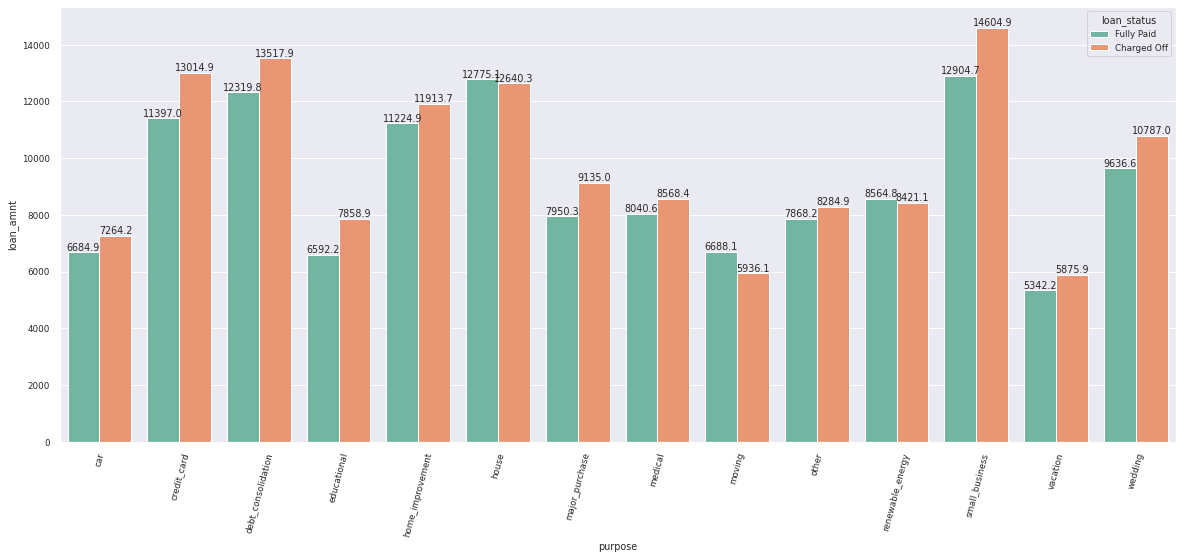

In [83]:
plt.figure(figsize=(20,8))
sns.set(font_scale=0.8)
plt.xticks(rotation=75)
ax = add_labels_to_barplot_multi('purpose','loan_amnt')
plt.show()

### Observation:
* Loan amount is highest for small businesses followed by debt consolidation.

---
Variables:
* Loan Amount
* Interest Rate


---



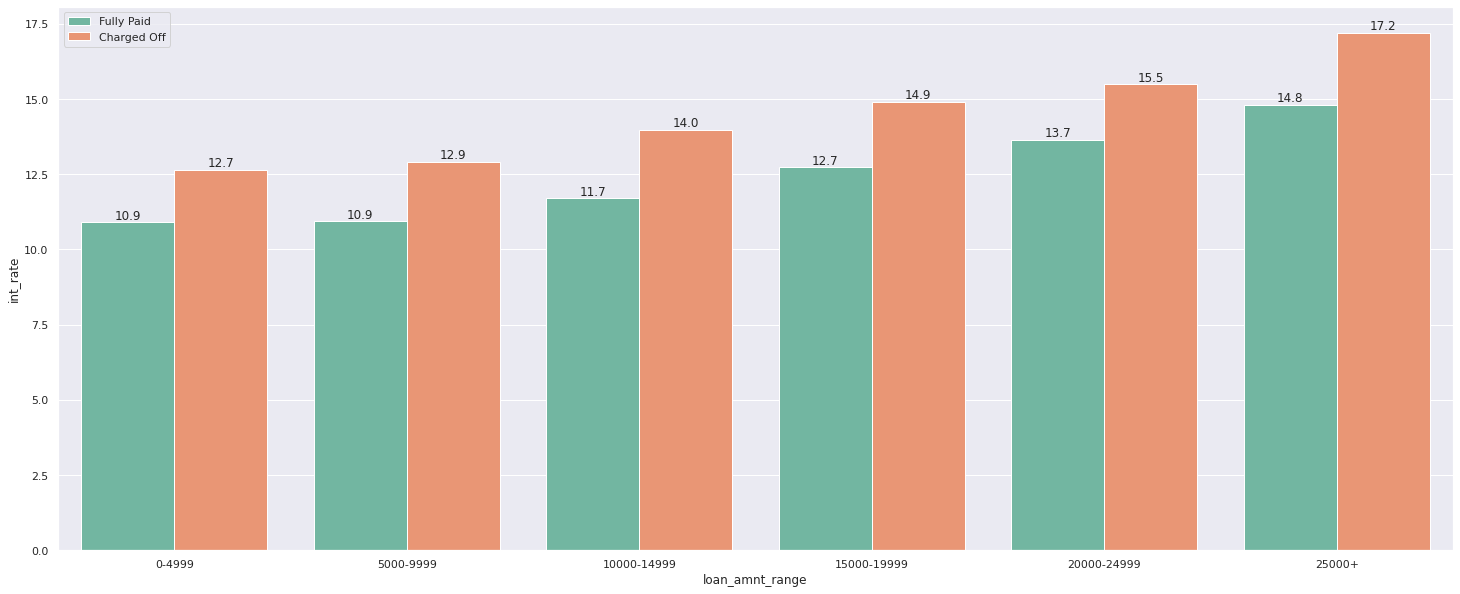

In [84]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1)
ax = add_labels_to_barplot_multi('loan_amnt_range','int_rate')
plt.legend(loc='upper left')
plt.show()

Observation:
* Higher the loan amount higher is the interest rate. The Lending Club wants to mitigate the risk of high charged off numbers.
* Lending club should continue charging high rate of interest on higher loan amount.



---


Variables:
* Grade
* Loan Amount


---



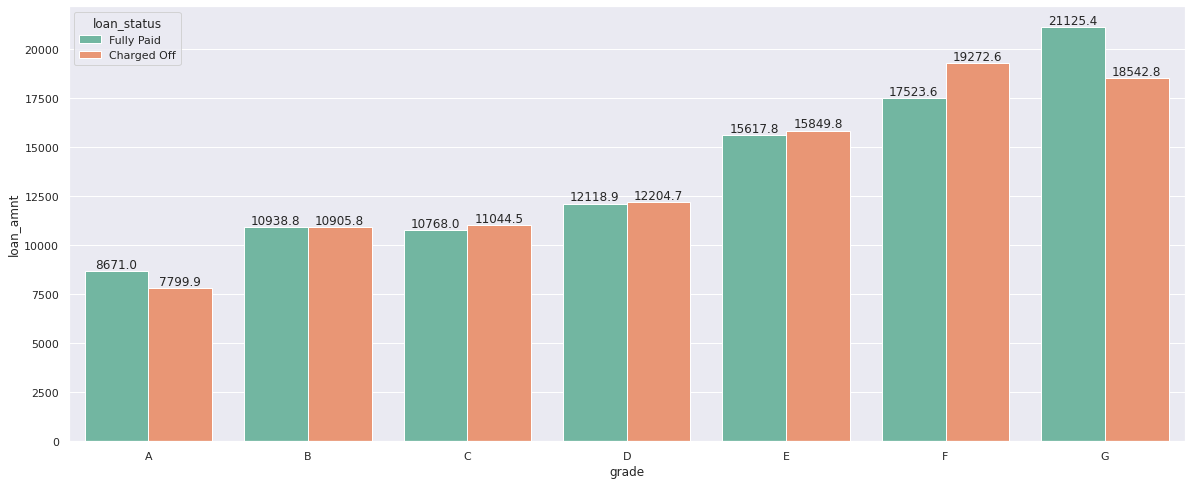

In [85]:
plt.figure(figsize=(20,8))
add_labels_to_barplot_multi('grade', 'loan_amnt')
plt.show()

### Obersvation


*   Lower grade customers have applied for higher amount of loan.
*   Lending club should take precaution while extending high loan amount to F grade customers




---
Variables:
* Grade
* Interest rate


---



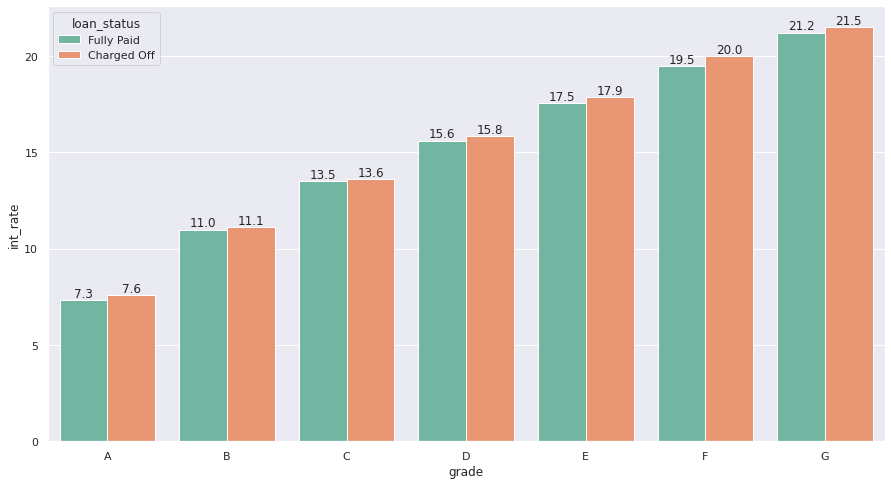

In [86]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
add_labels_to_barplot_multi('grade', 'int_rate')
plt.show()

Observation:
* Grade and interest are highly correlated.



---


Variables:
* Verification Status
* Loan Amount


---




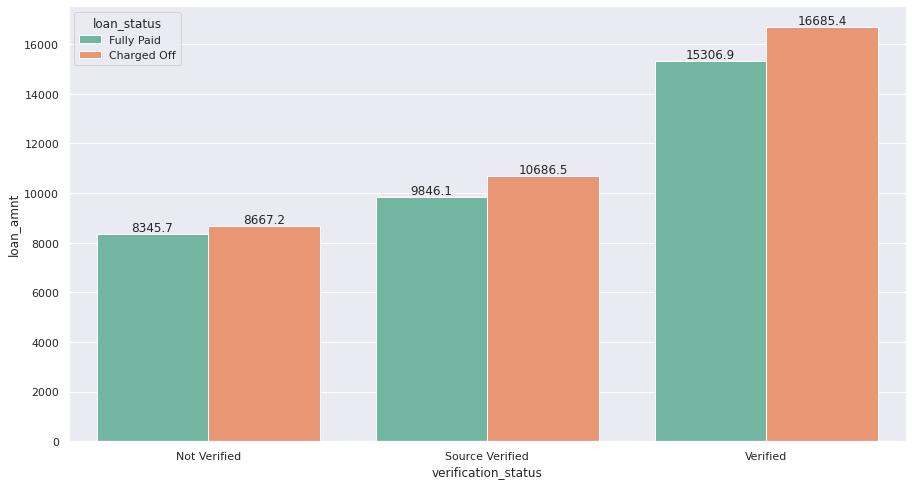

In [87]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1)
add_labels_to_barplot_multi('verification_status', 'loan_amnt')
plt.show()

Observation:
* Verified users apply for higher amount of loan and from above analysis.
*  Higher amount of loan has higher chances of being charged off. 



---


Variables:
* Purpose
* Interest rate


---



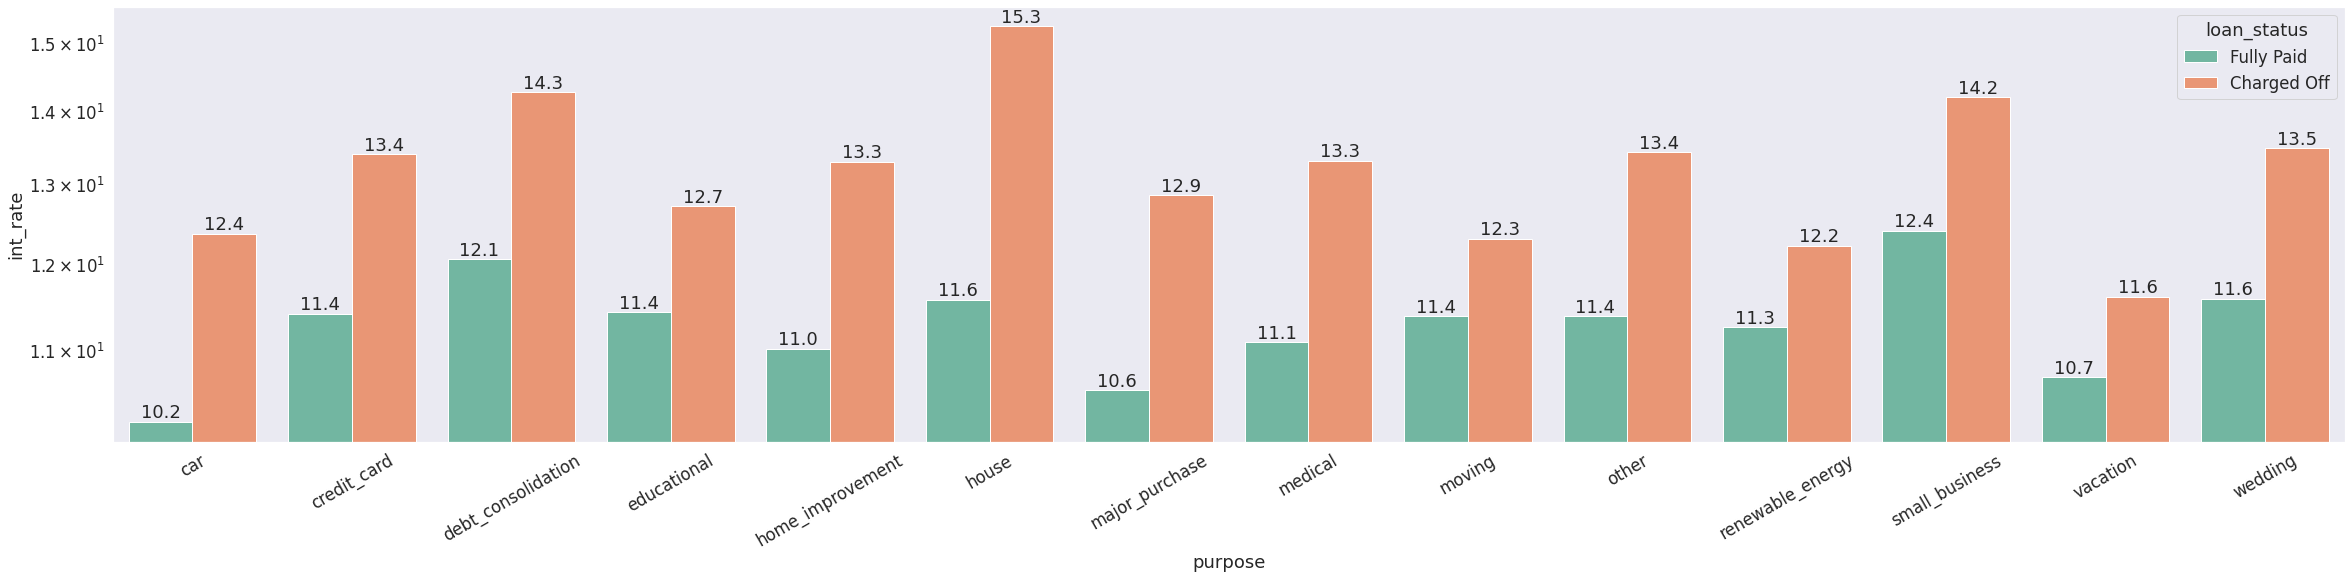

In [88]:
plt.figure(figsize=(40,8))
sns.set(font_scale=1.5)
add_labels_to_barplot_multi('purpose', 'int_rate')
plt.yscale('log')
plt.xticks(rotation=30)
plt.show()

Observation:
*   Loan extended for Home and small businesses are risky.
*   Higher the loan interest, higher the charged offs.



---


Variables:
* Term
* dti


---




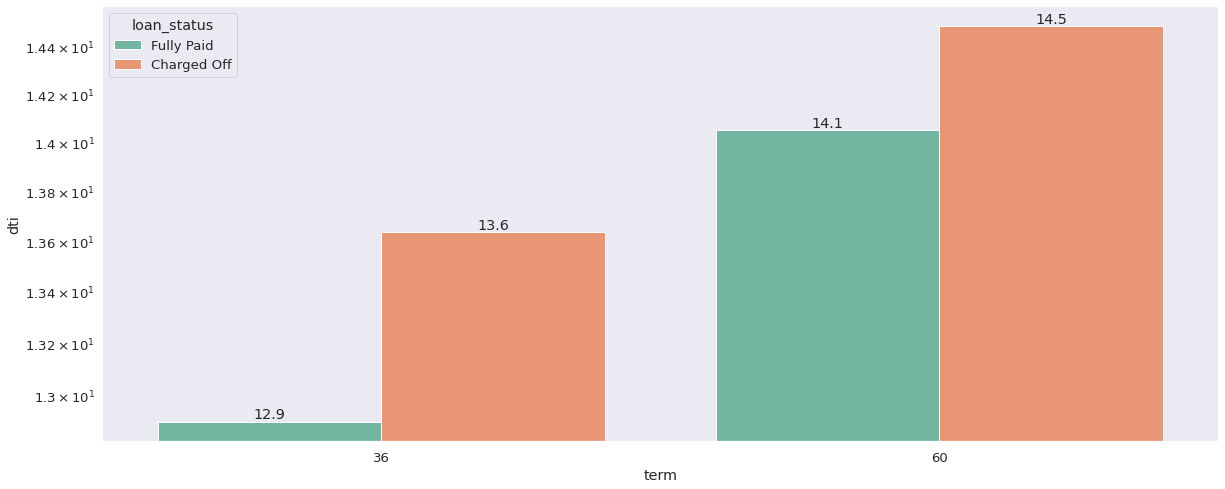

In [89]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.2)
plt.yscale('log')
add_labels_to_barplot_multi('term', 'dti')
plt.show()

Observations:

* ‘dti’ for fully paid customers who opted for 36 months term is ´significantly less compared to the charged-off customers.
* When the ‘dti’ is low the person is able to fully pay on the flip side when the ‘dti’ is high the person is always charged off. 
In the long term ‘dti’ is not playing that big role in determining fully paid vs charged off.



---


Variables:
* Annual Income
* dti


---



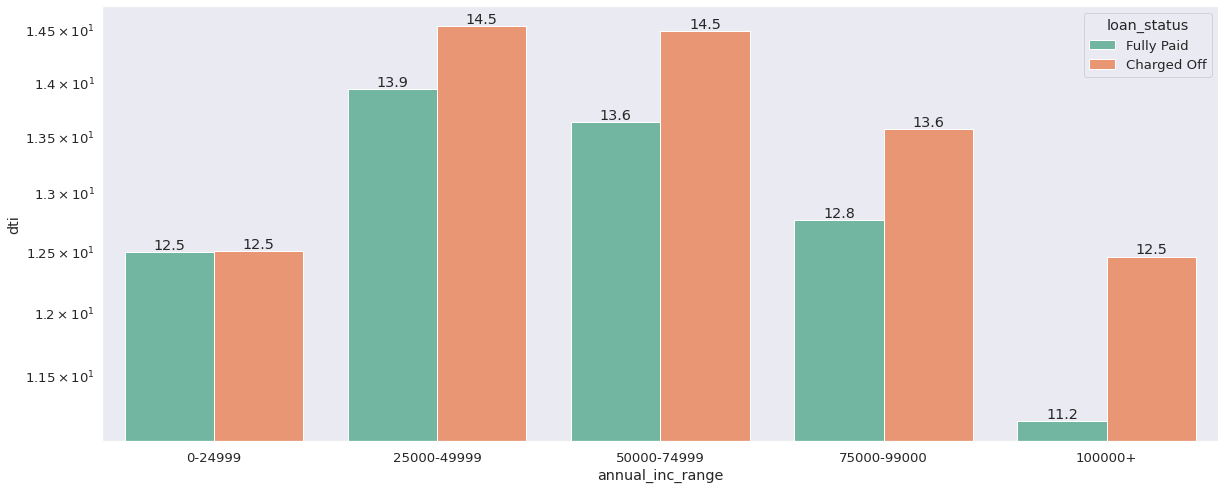

In [90]:
bins = [0, 25000, 50000, 75000, 100000, 1000000]
labels = ['0-24999', '25000-49999', '50000-74999', '75000-99000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins=bins, labels=labels)

plt.figure(figsize=(20,8))
sns.set(font_scale=1.2)
plt.yscale('log')
add_labels_to_barplot_multi('annual_inc_range', 'dti')
plt.show()

###Observation:
* For the lowest income range i.e. from 0 to 25k the dti of Fully paid and the dti of Charged off customers are equal which is opposite in other income groups, i.e. for rest all other income gruops the dti of Fully paid customers is always lower than the dti of Charged off customers.

* For the highest income group i.e. 100000+, the gap in dti between Fully paid and Charged off is more as compared to rest other income groups.



---


Variables: 
* Annual Income
* Loan Amount


---



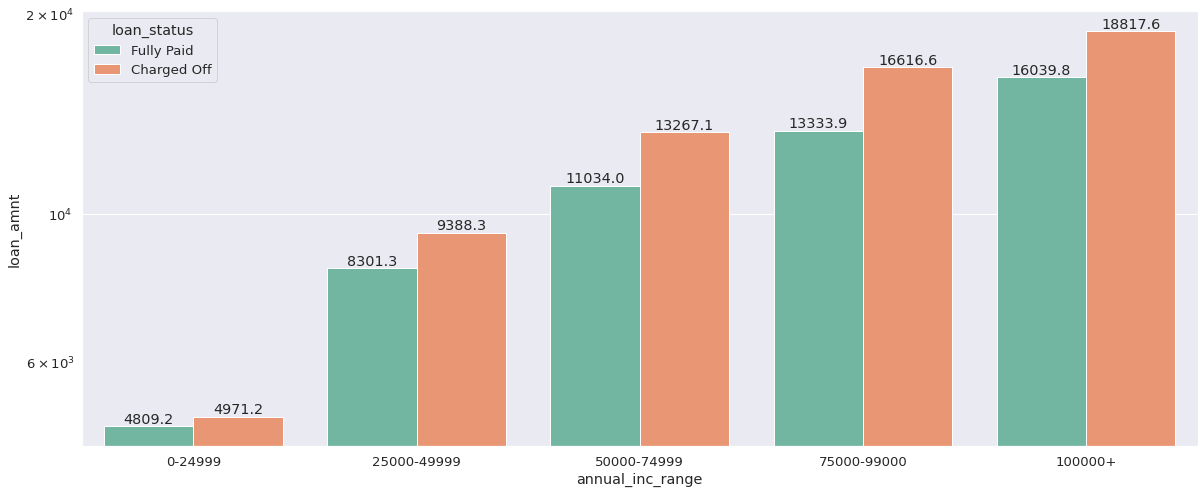

In [91]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.2)
plt.yscale('log')
add_labels_to_barplot_multi('annual_inc_range', 'loan_amnt')
plt.show()

Observation:
* If the annual income is low then there is very less difference between fully paid and charged off loans if funded amount is also less.That means less chance of loans getting charged off .



---
Variables:
* dti category
* Interest Rate


---





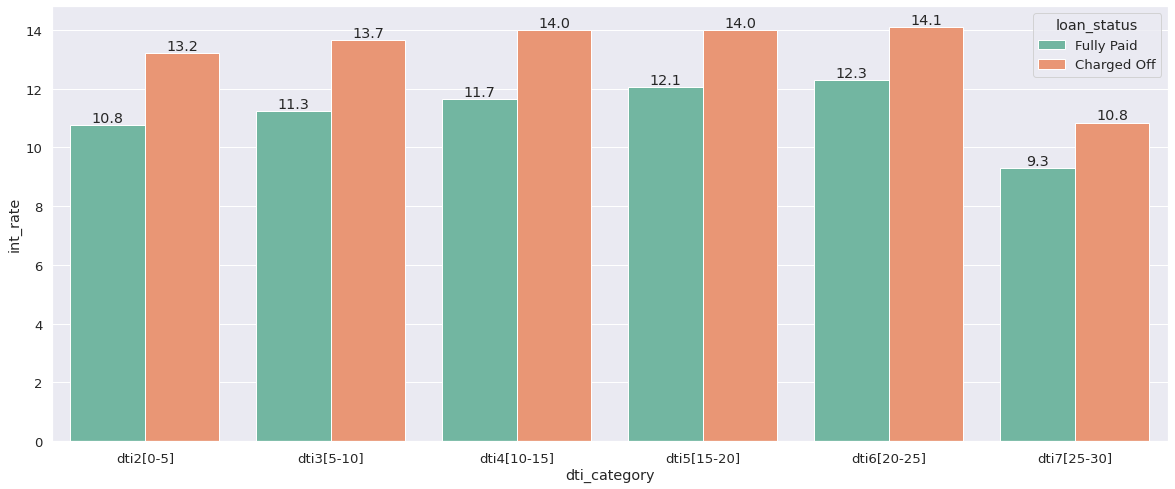

In [92]:
plt.figure(figsize=(20,8))
add_labels_to_barplot_multi('dti_category', 'int_rate')
plt.show()

### Observation:
* Lending club should charge higher rate of interest to customers with dti greater then 25%.



---


Variables: 
* dti
* Loan Amount


---



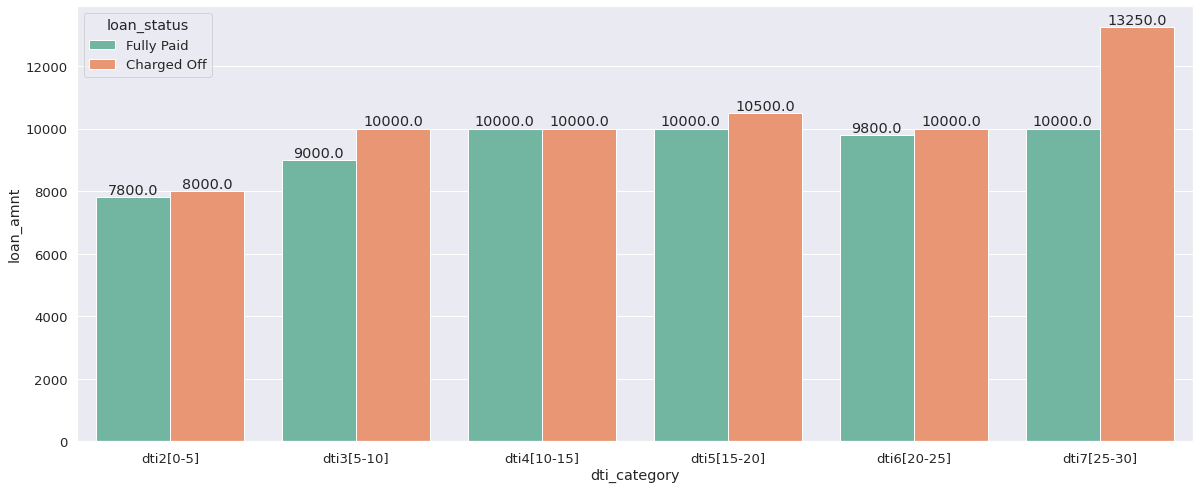

In [93]:
plt.figure(figsize=(20,8))
add_labels_to_barplot_multi_median('dti_category', 'loan_amnt')
plt.show()

## Observation:

for range [0-5] recommended loan amount is < 7800
for range [5-10] recommended loan amount is < 9000
for range [10-15] recommended loan amount is < 10K
for range [15-20] recommended loan amount is < 10K

# **Multivariate Analysis**

For all the applicable continuous variables

"dti","annual_inc","loan_amnt","funded_amnt","funded_amnt_inv","installment","int_rate"

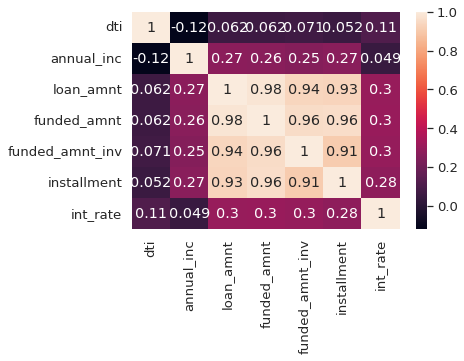

In [94]:
cont_vars = ["dti","annual_inc","loan_amnt","funded_amnt","funded_amnt_inv","installment","int_rate"] 
sns.heatmap(loan[cont_vars].corr(),annot = True) 
plt.show()

###Observation:

We can see strong correlation between "loan_amnt","funded_amnt","funded_amnt_inv","installment"

Rest have weak correlation with eachother

# **Conclusions:**

From Univariate and Segmented univariate analysis it can be concluded that the following columns are strong indicators of default

Below are the lists of driver variables:

* DTI
* Interest rate
* Purpose
* Grade
* Annual income
* Loan amount
* Term

and the key column is **Loan Status**

# **Observation Summary:**

**DTI:**
Lower the DTI value, lower the chance of defaulting, Higher the value of DTI higher the chances of defaulting

**Loan Terms:** 
Lower the loan terms lower the chances of loan amount being charged off
Higher the loan terms higher the chances of loan amount being charged off

5 years is a bigger term in comparison to 3 years, lot of factors change in these extra 2 years. Recession might come in, loss of job, annual income might come down, relocating to a higher cost of living city, increase in home rents, inflation, change in government, new regulations  are all possible reasons for increase in number of loan defaulter with higher loan terms

**Verification Status:** 
The above chart clearly shows the members with verified sources are more likely to default in comparison to non-verified sources, which is really strange as the purpose of verification is to reduce the number of defaulters

**Interest Rates:** 
The Lenders here are doing the correct thing by increasing the interest rates of risky loan requests in order to mitigate the risk of loan defaulting
Average interest rates for small business is around 13% and it has appeared loans for small business are at higher risks of defaulting

**Public Bankruptcies:** 
People with 0 bankruptcies are lesser prone to loan defaulting than people with bankruptcies files.
This variable clearly indicates that in previous occasions the loan requestors have failed to pay back the entire money and filed bankruptcy to reduce or eliminate the prior debts
So, clearly they have failed before and are likely to fail again based on the prior history of loan payment


**Purpose:** 
Smaller business seems to be having a higher risk of getting charged off in comparison to loans taken for personal purposes like wedding and car

Business related loans are always at higher risks as loan payments are often related to the profit made


**State Code, Zip Code & Cost of Living:** 
The first chart “ address state vs Charged off/Fully Paid ratio chart” has no trends as such

But, If we further drill down to Zip Codes, we can see the below trend
From the first chart let us consider Florida which is at higher risk of getting charged off
Then let us plot a ratio chart for all the zip codes in Florida.
Below is the observation:
322XX is Jacksonville FL, which is at a lower risk of defaulting
where as
331XX is Miami FL, which is at higher risk of defaulting
The cost of living in Miami, FL is 20.5% higher than in Jacksonville, FL Employers in Miami, FL typically pay 2.7% more than employers in Jacksonville, FL for the same type of job

HIGHER COST OF LIVING PLACES ARE MORE LIKELY TO BE DEFAULTERS


**Grades & Sub-Grades:** 
As we move from lower grade A to higher grade G, chances of defaulting increases
Similar trend is seen among sub grades within grades. Within a Grade, even if we move from 1 to 5 sub grade, the possibility of defaulting a loan is higher (in maximum case)

**Annual Income:** 
Lower the Annual Income range, higher the chance of defaulting, Higher the Annual Income range, lower the chances of defaulting
Negative correlation detected

**Loan Amount:**
Higher the fund amount higher is the risk of defaulting


# **Recommendations:**

**DTI:** 
If the DTI value is high, lenders can think of either not approving the loan or think of reducing the loan amount, if other variables are not putting red flags
If the DTI ratio is high, lenders can look at other variables more carefully like cost of living in a particular place, annual income trends over the years (up or down?)

**Loan Terms:**
Incase there are other variables showing red flags, then the lender can go for a shorter term considering factors like the current annual income is high or if one foresee a recession or rise in real estate price in the current locality


**Verification Status:** 
FRAUD ALERT: AUDIT YOUR VERIFICATION INTERNAL DEPARTMENT/PARTNERS/EXTERNAL SOURCES, IF GUILTY CHANGE THEM


**Interest Rates:** 
Annual Income high definitely is a major factor for loan approval, but along with the Annual Income, do consider the DTI and loan mount to Annual Income Ratio as well


**Public Bankruptcies:** 
For people who have a public record of bankruptcy filed on previous occasions of debt non clearance, check how much relaxation they received post filing of bankruptcy. If the restructured debt amount fits the new loan request (as long as any other driver variables are not giving any red flags), then go ahead with the loan approval else reject the loan request or lower the loan amount


**Purpose:** 
In case the loans are for business purpose, have options of recovering back from assets like home owned by the loan requestor. Have a proper background check to find out how successful the requestor has been in previous businesses. Also deep digger into the business to find out the probability of the business getting successful. Figure out who are the competitors of that business. Figure out how niche is that business.


**State Code, Zip Code & Cost of Living:** 
Add a new dataset which has city and it’s cost of living or a rank in terms of cost of living or some other metrics like average home rent in that county or city, which can give us some scope for analysis. Then map it against annual income.


**Annual Income:** 
Annual Income high definitely is a major factor for loan approval, but along with the Annual Income, do consider the DTI and loan mount to Annual Income Ratio as well 
